In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
plt.style.use(['ggplot'])

# Create Data

<h5> Generate some data with:
\begin{equation} \theta_0= 4 \end{equation} 
\begin{equation} \theta_1= 3 \end{equation} 

Add some Gaussian noise to the data

In [3]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

Let's plot our data to check the relation between X and Y

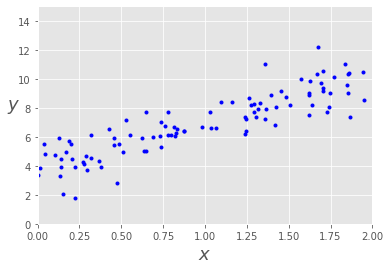

In [4]:

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

#  Analytical way of Linear Regression

In [5]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.81757624]
 [3.19271429]]


<h5>This is close to our real thetas 4 and 3. It cannot be accurate due to the noise I have introduced in data

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.81757624],
       [10.20300481]])

<h5>Let's plot prediction line with calculated:theta

[0, 2, 0, 15]

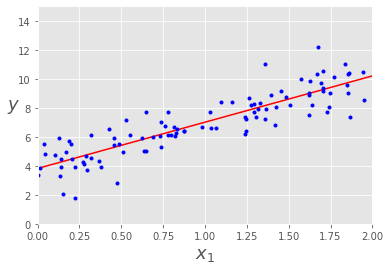

In [7]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])


# Gradient Descent

## Cost Function & Gradients

<h4> The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have  to be derived from the cost functions



<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [8]:

def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


In [9]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history
        
    
    

<h3> Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution

In [10]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.460,
Theta1:          3.500
Final cost/MSE:  5469.849


<h3> Let's plot the cost history over iterations

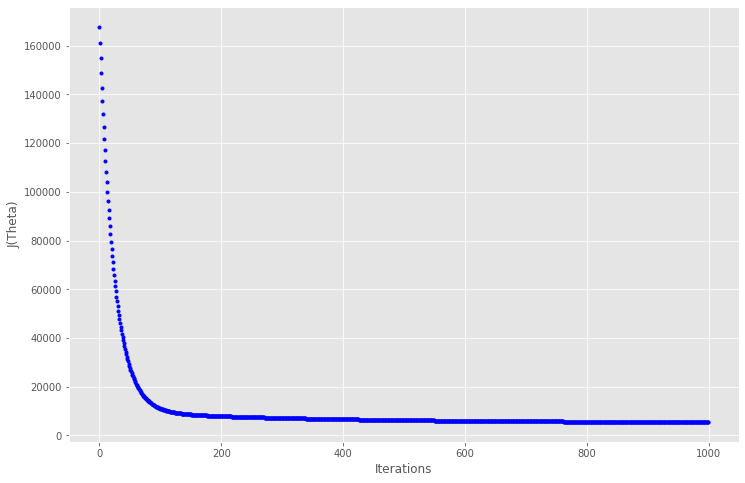

In [11]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

<h3> After around 150 iterations the cost is flat so the remaining iterations  are not needed or will not result in any further optimization. Let zoom in till iteration 200 and see the curve

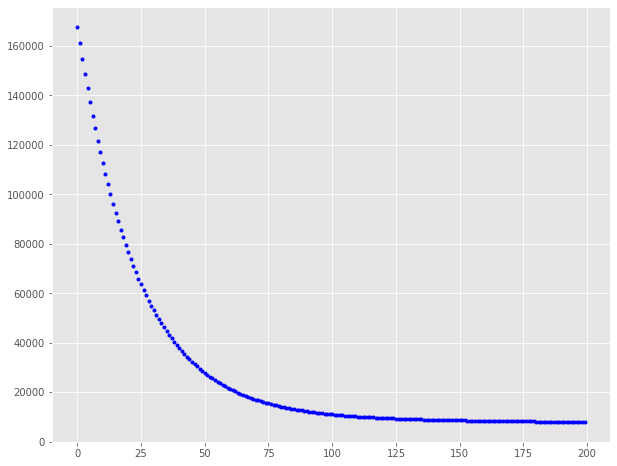

In [12]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

<b>It is worth while to note that the cost drops faster initially and then the gain in cost reduction is not as much

### It would be great to see the effect of different learning rates and iterations together

### Let build a function which can show the effects together and also show how gradient decent actually is working

In [13]:

def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

### Plot the graphs for different iterations and learning rates combination

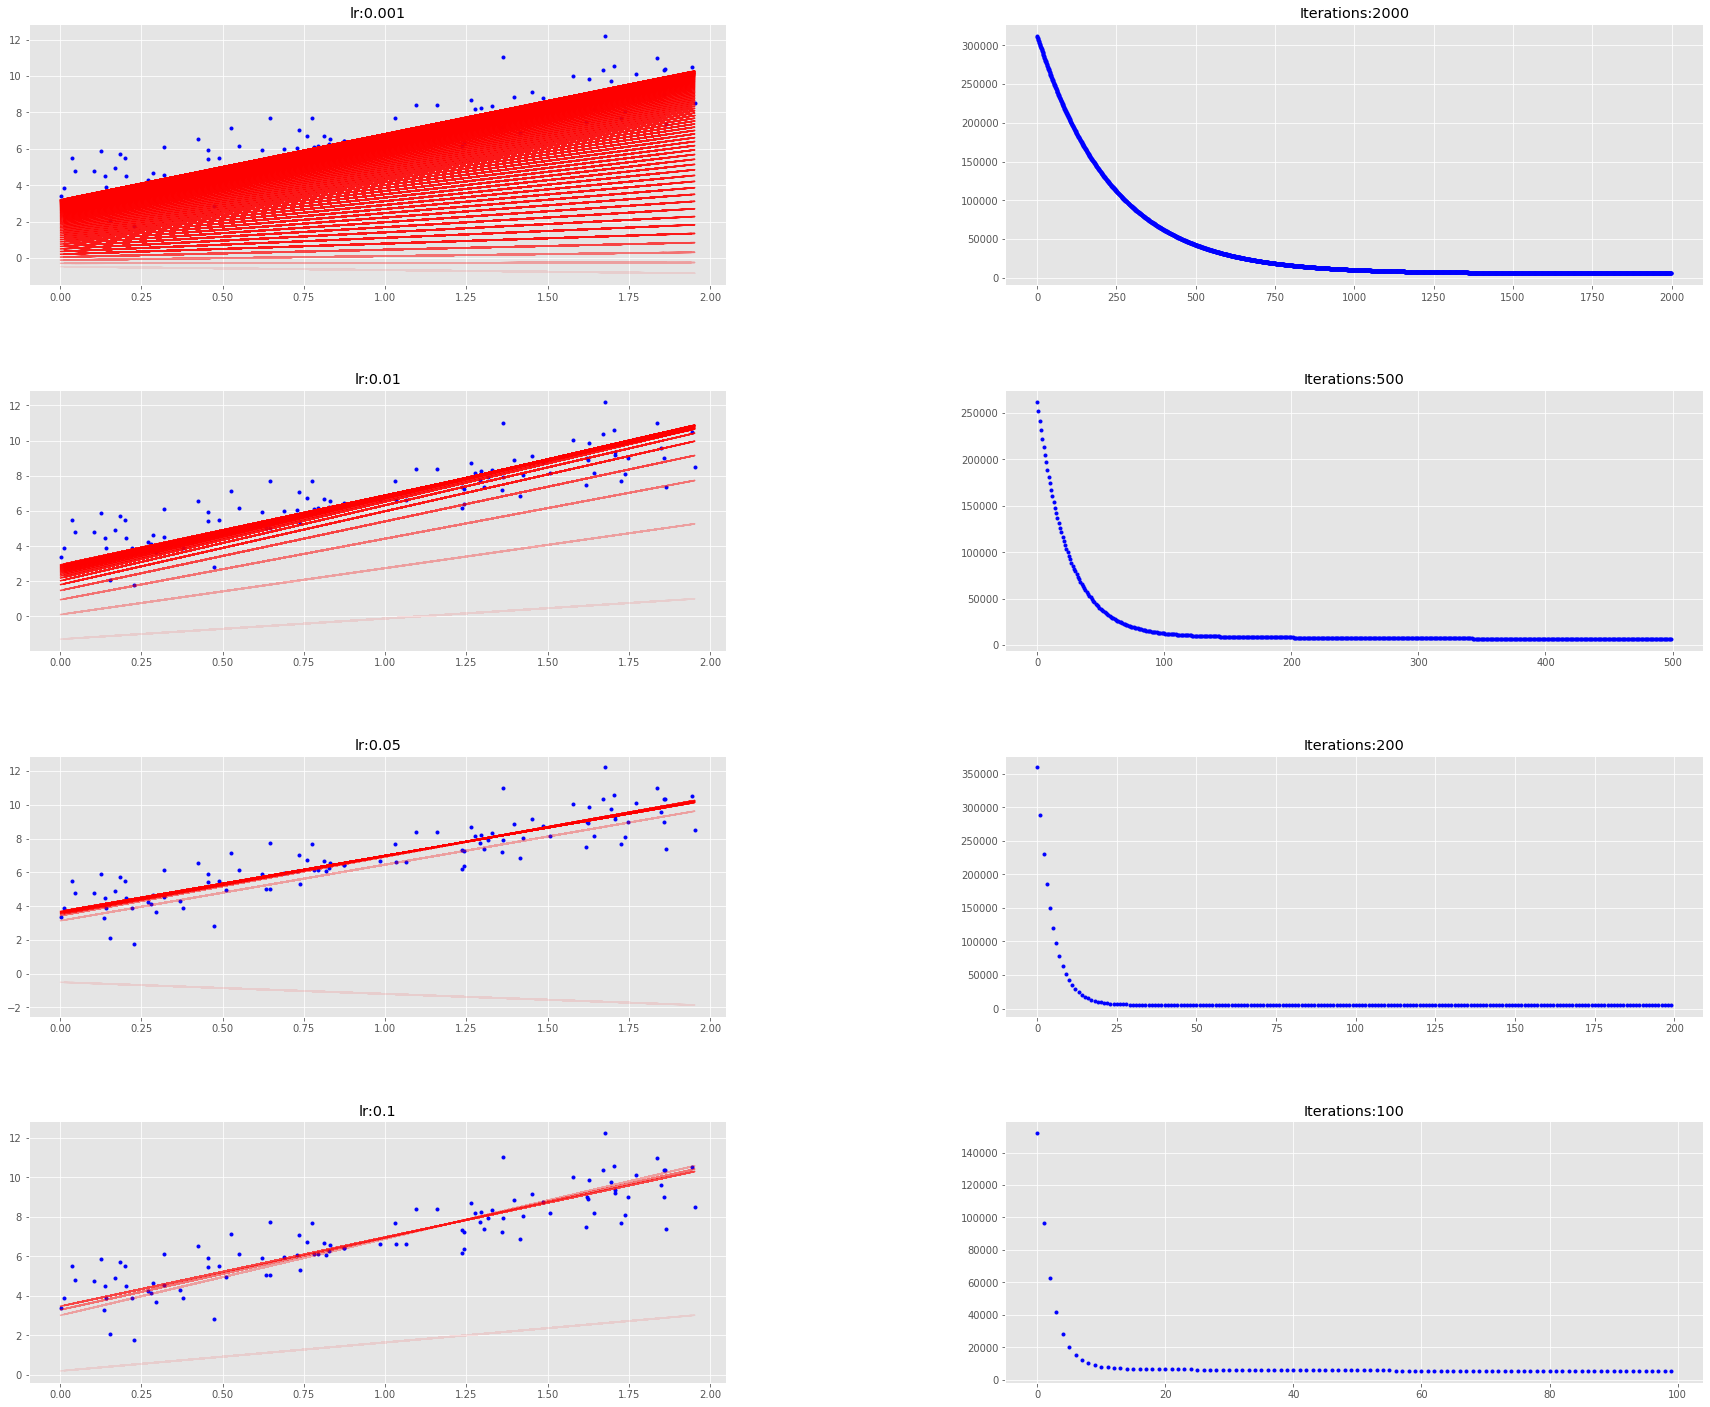

In [14]:
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)
    

<b> See how useful it is to visualize the effect of learning rates and iterations on gradient descent. The red lines show how the gradient descent starts and then slowly gets closer to the final value

## Plot Indiviual graphs to zoom in

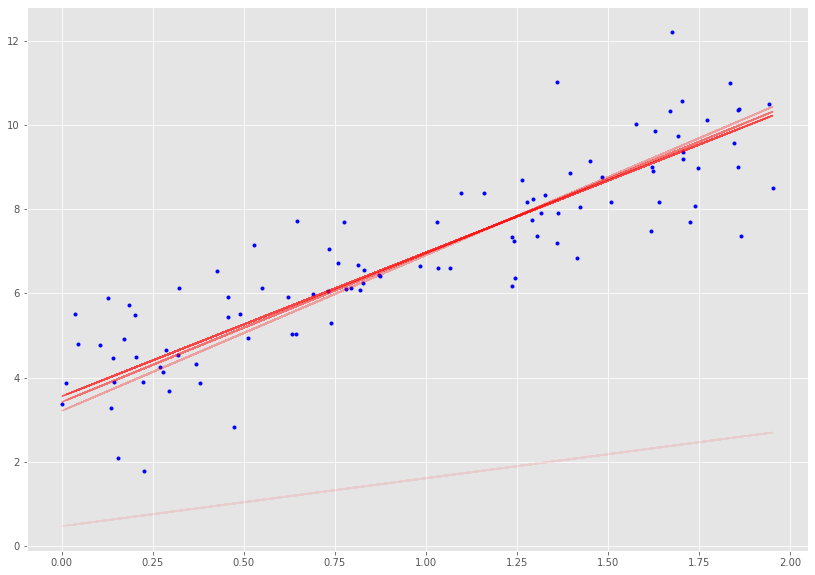

In [15]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

# Stochastic Gradient Descent

In [16]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [17]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.808,
Theta1:          3.190
Final cost/MSE:  56.661


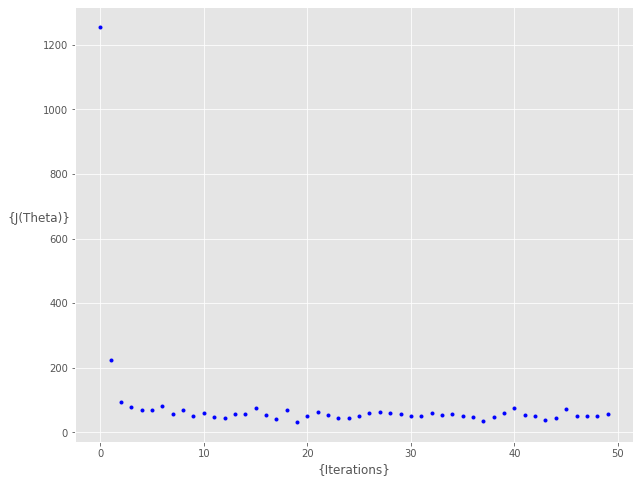

In [18]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

# Mini Batch Gradient Descent

In [19]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [20]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.830,
Theta1:          3.182
Final cost/MSE:  1055.818


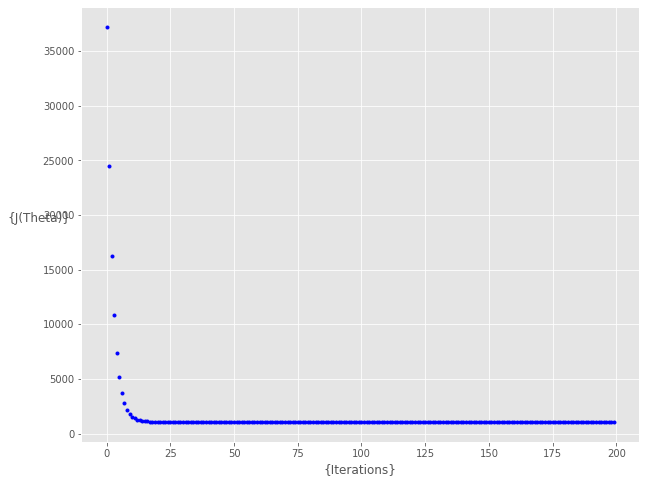

In [21]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

In [22]:
# Implementing Gradient Descent: Applying to Any Number of Neurons
# A single hidden layer with any number of neurons.
import numpy
import matplotlib.pyplot

def sigmoid(sop):
    return 1.0/(1+numpy.exp(-1*sop))

def error(predicted, target):
    return numpy.power(predicted-target, 2)

def error_predicted_deriv(predicted, target):
    return 2*(predicted-target)

def sigmoid_sop_deriv(sop):
    return sigmoid(sop)*(1.0-sigmoid(sop))

def sop_w_deriv(x):
    return x

def update_w(w, grad, learning_rate):
    return w - learning_rate*grad

x = numpy.array([0.1, 0.4, 4.1])
target = numpy.array([0.2])

learning_rate = 0.001

# Number of inputs, number of neurons per each hidden layer, number of output neurons
network_architecture = numpy.array([x.shape[0], 8, 1])

# Initializing the weights of the entire network
w = []
w_temp = []
for layer_counter in numpy.arange(network_architecture.shape[0]-1):
    for neuron_nounter in numpy.arange(network_architecture[layer_counter+1]):
        w_temp.append(numpy.random.rand(network_architecture[layer_counter]))
    w.append(numpy.array(w_temp))
    w_temp = []
w = numpy.array(w)
w_old = w
print("Initial W : ", w)

for k in range(80000):
    # Forward Pass
    # Hidden Layer Calculations
    sop_hidden = numpy.matmul(w[0], x)

    sig_hidden = sigmoid(sop_hidden)

    # Output Layer Calculations
    sop_output = numpy.sum(w[1][0]*sig_hidden)

    predicted = sigmoid(sop_output)
    err = error(predicted, target)

    # Backward Pass
    g1 = error_predicted_deriv(predicted, target)

    ### Working with weights between hidden and output layer
    g2 = sigmoid_sop_deriv(sop_output)
    g3 = sop_w_deriv(sig_hidden)
    grad_hidden_output = g3*g2*g1
    w[1][0] = update_w(w[1][0], grad_hidden_output, learning_rate)
    
    ### Working with weights between input and hidden layer
    g5 = sop_w_deriv(x)
    for neuron_idx in numpy.arange(w[0].shape[0]):
        g3 = sop_w_deriv(w_old[1][0][neuron_idx])
        g4 = sigmoid_sop_deriv(sop_hidden[neuron_idx])
        grad_hidden_input = g5*g4*g3*g2*g1
        w[0][neuron_idx] = update_w(w[0][neuron_idx], grad_hidden_input, learning_rate)

    w_old = w
    print(predicted)

Initial W :  [array([[0.17524602, 0.20617322, 0.73801967],
       [0.98631467, 0.88831025, 0.68658038],
       [0.53195656, 0.3842525 , 0.1546277 ],
       [0.22737083, 0.84737949, 0.70791011],
       [0.10372088, 0.52114643, 0.38952984],
       [0.35455698, 0.64685428, 0.30802684],
       [0.69249659, 0.35890079, 0.23811898],
       [0.22900851, 0.27262849, 0.23959118]])
 array([[0.82258383, 0.84748307, 0.56162147, 0.46077128, 0.96049376,
        0.92892856, 0.56367837, 0.3977921 ]])]
0.9915536467703041
0.9915528795386871
0.9915521121733246
0.9915513446741819
0.9915505770412254
0.9915498092744207
0.9915490413737333
0.9915482733391293
0.9915475051705742
0.9915467368680339
0.991545968431474
0.9915451998608603
0.9915444311561583
0.991543662317334
0.9915428933443531
0.9915421242371809
0.9915413549957833
0.9915405856201259
0.9915398161101743
0.9915390464658942
0.9915382766872513
0.9915375067742108
0.9915367367267388
0.9915359665448005
0.9915351962283614
0.9915344257773875
0.991533655191843

0.9910225023077361
0.9910216398923128
0.9910207773181317
0.9910199145851498
0.9910190516933245
0.9910181886426127
0.9910173254329718
0.9910164620643588
0.9910155985367308
0.9910147348500449
0.9910138710042582
0.9910130069993276
0.9910121428352102
0.9910112785118631
0.9910104140292434
0.9910095493873079
0.9910086845860137
0.9910078196253176
0.9910069545051767
0.9910060892255479
0.9910052237863882
0.9910043581876544
0.9910034924293033
0.9910026265112918
0.991001760433577
0.9910008941961156
0.9910000277988643
0.9909991612417801
0.9909982945248195
0.9909974276479396
0.9909965606110972
0.9909956934142488
0.990994826057351
0.9909939585403609
0.9909930908632352
0.9909922230259303
0.990991355028403
0.9909904868706099
0.990989618552508
0.9909887500740533
0.9909878814352029
0.9909870126359134
0.990986143676141
0.9909852745558424
0.9909844052749744
0.9909835358334933
0.9909826662313559
0.9909817964685181
0.9909809265449371
0.9909800564605689
0.9909791862153702
0.9909783158092973
0.990977445242306

0.9905382455188568
0.9905372918264621
0.9905363379501052
0.9905353838897342
0.9905344296452973
0.9905334752167421
0.9905325206040168
0.9905315658070694
0.9905306108258478
0.9905296556603003
0.9905287003103741
0.9905277447760176
0.9905267890571786
0.9905258331538047
0.9905248770658442
0.9905239207932445
0.9905229643359535
0.9905220076939191
0.9905210508670889
0.9905200938554108
0.9905191366588324
0.9905181792773012
0.9905172217107654
0.9905162639591722
0.9905153060224696
0.9905143479006049
0.9905133895935258
0.9905124311011799
0.9905114724235148
0.990510513560478
0.9905095545120169
0.9905085952780792
0.9905076358586126
0.9905066762535639
0.9905057164628811
0.9905047564865116
0.9905037963244027
0.9905028359765015
0.9905018754427556
0.9905009147231126
0.9904999538175195
0.9904989927259236
0.9904980314482725
0.9904970699845131
0.9904961083345929
0.990495146498459
0.9904941844760586
0.990493222267339
0.9904922598722474
0.9904912972907307
0.9904903345227364
0.9904893715682113
0.9904884084271

0.9895273260634168
0.9895261681907374
0.9895250100737311
0.9895238517123224
0.989522693106436
0.9895215342559964
0.9895203751609285
0.9895192158211564
0.9895180562366047
0.9895168964071982
0.9895157363328606
0.9895145760135171
0.9895134154490917
0.9895122546395086
0.9895110935846925
0.9895099322845674
0.9895087707390575
0.9895076089480873
0.9895064469115807
0.9895052846294623
0.9895041221016556
0.9895029593280851
0.9895017963086747
0.9895006330433486
0.9894994695320307
0.989498305774645
0.9894971417711155
0.9894959775213659
0.9894948130253205
0.9894936482829026
0.9894924832940364
0.9894913180586455
0.989490152576654
0.9894889868479854
0.9894878208725632
0.9894866546503113
0.9894854881811531
0.9894843214650126
0.989483154501813
0.9894819872914783
0.9894808198339313
0.9894796521290962
0.989478484176896
0.9894773159772543
0.9894761475300944
0.98947497883534
0.9894738098929138
0.9894726407027394
0.9894714712647402
0.9894703015788394
0.9894691316449601
0.9894679614630254
0.9894667910329584


0.9888344278070659
0.9888331194899331
0.9888318108807479
0.9888305019794148
0.9888291927858387
0.9888278832999244
0.9888265735215765
0.9888252634507
0.9888239530871988
0.9888226424309783
0.9888213314819426
0.9888200202399965
0.9888187087050438
0.9888173968769898
0.9888160847557383
0.9888147723411937
0.9888134596332606
0.9888121466318428
0.9888108333368449
0.9888095197481711
0.988808205865725
0.9888068916894115
0.988805577219134
0.9888042624547967
0.9888029473963037
0.9888016320435588
0.9888003163964659
0.988799000454929
0.9887976842188515
0.9887963676881378
0.9887950508626911
0.9887937337424152
0.9887924163272139
0.9887910986169907
0.9887897806116491
0.9887884623110927
0.9887871437152251
0.9887858248239494
0.9887845056371692
0.9887831861547879
0.9887818663767088
0.9887805463028353
0.9887792259330701
0.9887779052673168
0.9887765843054787
0.9887752630474586
0.9887739414931597
0.9887726196424849
0.9887712974953372
0.9887699750516197
0.988768652311235
0.9887673292740865
0.9887660059400765


0.9877170375686692
0.987715468979028
0.9877139000088676
0.9877123306580537
0.9877107609264517
0.9877091908139269
0.987707620320345
0.9877060494455707
0.9877044781894694
0.9877029065519064
0.9877013345327467
0.9876997621318548
0.9876981893490965
0.9876966161843361
0.9876950426374387
0.9876934687082688
0.9876918943966911
0.9876903197025706
0.9876887446257715
0.9876871691661583
0.987685593323596
0.987684017097948
0.9876824404890794
0.9876808634968542
0.9876792861211365
0.9876777083617906
0.9876761302186803
0.9876745516916698
0.9876729727806233
0.9876713934854042
0.9876698138058766
0.9876682337419042
0.9876666532933503
0.9876650724600792
0.987663491241954
0.9876619096388384
0.9876603276505957
0.9876587452770893
0.9876571625181828
0.9876555793737389
0.987653995843621
0.9876524119276924
0.987650827625816
0.9876492429378548
0.9876476578636719
0.9876460724031301
0.9876444865560916
0.98764290032242
0.9876413137019776
0.987639726694627
0.9876381393002307
0.9876365515186514
0.9876349633497512
0.9

0.9867875040405112
0.9867857026082227
0.9867839007104722
0.9867820983470843
0.9867802955178843
0.9867784922226971
0.986776688461347
0.9867748842336593
0.9867730795394584
0.9867712743785687
0.9867694687508147
0.9867676626560208
0.9867658560940114
0.9867640490646101
0.9867622415676418
0.9867604336029301
0.9867586251702987
0.9867568162695719
0.9867550069005729
0.986753197063126
0.9867513867570542
0.9867495759821815
0.9867477647383308
0.9867459530253259
0.9867441408429897
0.9867423281911454
0.9867405150696159
0.9867387014782246
0.9867368874167941
0.9867350728851472
0.9867332578831066
0.9867314424104947
0.9867296264671347
0.9867278100528484
0.9867259931674582
0.986724175810787
0.9867223579826563
0.9867205396828884
0.9867187209113052
0.986716901667729
0.986715081951981
0.9867132617638836
0.9867114411032584
0.9867096199699263
0.9867077983637094
0.986705976284429
0.9867041537319062
0.9867023307059624
0.9867005072064186
0.986698683233096
0.9866968587858154
0.9866950338643977
0.9866932084686637


0.98579600137438
0.9857939355372123
0.9857918691320646
0.9857898021587105
0.9857877346169224
0.9857856665064737
0.9857835978271374
0.9857815285786861
0.9857794587608923
0.9857773883735285
0.985775317416367
0.9857732458891805
0.9857711737917408
0.9857691011238199
0.9857670278851899
0.9857649540756225
0.9857628796948893
0.9857608047427618
0.9857587292190116
0.98575665312341
0.9857545764557283
0.9857524992157373
0.9857504214032079
0.9857483430179113
0.985746264059618
0.9857441845280986
0.9857421044231236
0.9857400237444635
0.9857379424918882
0.985735860665168
0.9857337782640732
0.9857316952883731
0.985729611737838
0.9857275276122371
0.9857254429113402
0.9857233576349165
0.9857212717827355
0.9857191853545663
0.9857170983501777
0.9857150107693388
0.9857129226118184
0.9857108338773851
0.9857087445658077
0.9857066546768544
0.9857045642102935
0.9857024731658931
0.9857003815434218
0.9856982893426467
0.9856961965633363
0.9856941032052581
0.9856920092681797
0.9856899147518684
0.9856878196560919
0

0.9841815957047106
0.9841790646810045
0.9841765328947898
0.9841740003457339
0.9841714670335041
0.9841689329577671
0.9841663981181897
0.9841638625144381
0.9841613261461795
0.9841587890130793
0.9841562511148036
0.9841537124510186
0.9841511730213894
0.9841486328255816
0.9841460918632605
0.9841435501340912
0.9841410076377383
0.9841384643738665
0.9841359203421405
0.9841333755422242
0.984130829973782
0.9841282836364775
0.9841257365299745
0.9841231886539368
0.9841206400080271
0.9841180905919091
0.9841155404052455
0.984112989447699
0.9841104377189321
0.9841078852186073
0.9841053319463865
0.984102777901932
0.9841002230849055
0.9840976674949685
0.9840951111317825
0.9840925539950084
0.9840899960843074
0.9840874373993405
0.984084877939768
0.9840823177052506
0.9840797566954482
0.9840771949100212
0.9840746323486294
0.984072069010932
0.9840695048965891
0.9840669400052595
0.9840643743366023
0.9840618078902768
0.9840592406659412
0.9840566726632541
0.984054103881874
0.9840515343214589
0.9840489639816664

0.9829573335037888
0.9829544217225302
0.9829515090073838
0.9829485953579161
0.9829456807736944
0.982942765254285
0.9829398487992546
0.9829369314081687
0.9829340130805936
0.9829310938160946
0.982928173614237
0.982925252474586
0.9829223303967062
0.9829194073801619
0.9829164834245177
0.9829135585293375
0.9829106326941849
0.9829077059186233
0.9829047782022161
0.9829018495445261
0.9828989199451159
0.9828959894035479
0.9828930579193843
0.9828901254921869
0.9828871921215173
0.9828842578069371
0.9828813225480071
0.982878386344288
0.9828754491953406
0.9828725111007253
0.9828695720600016
0.9828666320727296
0.9828636911384687
0.9828607492567782
0.982857806427217
0.9828548626493439
0.982851917922717
0.9828489722468946
0.9828460256214347
0.982843078045895
0.9828401295198324
0.9828371800428045
0.9828342296143677
0.9828312782340789
0.982828325901494
0.9828253726161693
0.9828224183776605
0.9828194631855232
0.9828165070393121
0.9828135499385827
0.9828105918828893
0.9828076328717863
0.9828046729048281
0

0.9799142130427065
0.9799102537959987
0.9799062930949523
0.9799023309387991
0.9798983673267705
0.979894402258098
0.9798904357320113
0.9798864677477407
0.9798824983045152
0.979878527401564
0.9798745550381154
0.9798705812133968
0.9798666059266357
0.9798626291770588
0.9798586509638922
0.9798546712863615
0.9798506901436922
0.9798467075351083
0.9798427234598344
0.9798387379170937
0.9798347509061095
0.9798307624261042
0.9798267724762993
0.979822781055917
0.9798187881641776
0.9798147938003016
0.9798107979635088
0.9798068006530184
0.9798028018680492
0.9797988016078196
0.9797947998715473
0.979790796658449
0.9797867919677415
0.9797827857986412
0.9797787781503634
0.9797747690221228
0.9797707584131344
0.9797667463226117
0.9797627327497683
0.9797587176938168
0.9797547011539698
0.9797506831294388
0.9797466636194351
0.9797426426231693
0.979738620139852
0.9797345961686923
0.9797305707088994
0.9797265437596816
0.9797225153202471
0.9797184853898033
0.9797144539675572
0.9797104210527151
0.979706386644482

0.9767269457052156
0.9767217414298365
0.9767165350021393
0.9767113264208515
0.9767061156846991
0.9767009027924083
0.9766956877427033
0.9766904705343077
0.9766852511659444
0.9766800296363347
0.9766748059441996
0.9766695800882587
0.9766643520672307
0.9766591218798331
0.9766538895247832
0.9766486550007965
0.976643418306588
0.9766381794408714
0.9766329384023595
0.9766276951897644
0.976622449801797
0.9766172022371672
0.9766119524945839
0.9766067005727551
0.9766014464703878
0.9765961901861879
0.9765909317188605
0.9765856710671096
0.9765804082296382
0.9765751432051487
0.9765698759923416
0.9765646065899171
0.9765593349965745
0.9765540612110117
0.9765487852319259
0.9765435070580133
0.9765382266879685
0.9765329441204862
0.9765276593542592
0.9765223723879797
0.9765170832203386
0.9765117918500261
0.9765064982757315
0.9765012024961429
0.9764959045099468
0.9764906043158301
0.9764853019124775
0.9764799972985729
0.9764746904727998
0.9764693814338401
0.9764640701803746
0.9764587567110837
0.976453441024

0.9725658009832411
0.9725587566305485
0.9725517089652357
0.9725446579850926
0.9725376036879069
0.9725305460714648
0.9725234851335506
0.972516420871946
0.9725093532844318
0.9725022823687862
0.972495208122786
0.9724881305442057
0.9724810496308179
0.9724739653803939
0.9724668777907025
0.9724597868595108
0.9724526925845838
0.9724455949636849
0.9724384939945752
0.9724313896750144
0.9724242820027601
0.9724171709755677
0.972410056591191
0.9724029388473819
0.9723958177418899
0.9723886932724632
0.9723815654368478
0.9723744342327879
0.9723672996580254
0.9723601617103006
0.972353020387352
0.9723458756869158
0.9723387276067261
0.972331576144516
0.9723244212980156
0.9723172630649538
0.9723101014430571
0.9723029364300502
0.9722957680236559
0.972288596221595
0.9722814210215865
0.9722742424213471
0.9722670604185919
0.9722598750110338
0.9722526861963838
0.9722454939723513
0.9722382983366432
0.9722310992869645
0.9722238968210183
0.9722166909365064
0.9722094816311274
0.9722022689025788
0.9721950527485558

0.9687050220603525
0.9686960665371795
0.968687106362942
0.9686781415342374
0.96866917204766
0.9686601978998014
0.9686512190872489
0.9686422356065881
0.9686332474544002
0.9686242546272639
0.9686152571217547
0.9686062549344446
0.9685972480619028
0.9685882365006948
0.9685792202473834
0.9685701992985281
0.9685611736506851
0.9685521433004073
0.9685431082442446
0.9685340684787439
0.9685250240004485
0.9685159748058982
0.9685069208916307
0.9684978622541791
0.9684887988900743
0.9684797307958437
0.9684706579680112
0.9684615804030978
0.9684524980976212
0.9684434110480955
0.968434319251032
0.9684252227029384
0.9684161214003197
0.9684070153396772
0.9683979045175087
0.9683887889303094
0.9683796685745707
0.9683705434467811
0.9683614135434254
0.9683522788609856
0.9683431393959399
0.9683339951447639
0.9683248461039293
0.9683156922699048
0.9683065336391555
0.9682973702081437
0.9682882019733279
0.9682790289311637
0.9682698510781033
0.9682606684105952
0.9682514809250852
0.968242288618015
0.968233091485823

0.9588819725351487
0.9588673549039531
0.9588527280575272
0.9588380919878481
0.9588234466868838
0.9588087921465934
0.9587941283589276
0.9587794553158285
0.958764773009229
0.958750081431054
0.958735380573219
0.9587206704276312
0.9587059509861889
0.9586912222407815
0.9586764841832898
0.9586617368055855
0.9586469800995324
0.9586322140569842
0.9586174386697868
0.9586026539297766
0.9585878598287819
0.9585730563586212
0.9585582435111051
0.9585434212780345
0.9585285896512022
0.9585137486223914
0.9584988981833765
0.9584840383259237
0.9584691690417891
0.958454290322721
0.9584394021604579
0.9584245045467298
0.9584095974732575
0.9583946809317532
0.9583797549139195
0.9583648194114501
0.9583498744160305
0.958334919919336
0.9583199559130335
0.958304982388781
0.958289999338227
0.9582750067530109
0.9582600046247636
0.9582449929451061
0.9582299717056509
0.9582149408980013
0.9581999005137511
0.9581848505444852
0.9581697909817796
0.9581547218172003
0.9581396430423051
0.9581245546486422
0.9581094566277505


0.9498411528153071
0.9498204354626522
0.949799703261344
0.9497789561969759
0.9497581942551251
0.9497374174213514
0.9497166256811974
0.9496958190201894
0.9496749974238358
0.9496541608776283
0.9496333093670424
0.9496124428775349
0.9495915613945468
0.9495706649035013
0.9495497533898049
0.9495288268388462
0.9495078852359976
0.9494869285666131
0.9494659568160306
0.9494449699695701
0.9494239680125343
0.9494029509302085
0.9493819187078614
0.9493608713307433
0.9493398087840879
0.949318731053111
0.9492976381230113
0.94927652997897
0.9492554066061505
0.9492342679896989
0.9492131141147441
0.9491919449663969
0.9491707605297509
0.9491495607898819
0.9491283457318486
0.949107115340691
0.9490858696014325
0.9490646084990781
0.9490433320186157
0.9490220401450151
0.9490007328632282
0.9489794101581894
0.9489580720148152
0.9489367184180042
0.9489153493526374
0.9488939648035776
0.94887256475567
0.9488511491937414
0.9488297181026012
0.9488082714670408
0.9487868092718332
0.9487653315017335
0.9487438381414793


0.9280949971161171
0.928056893937923
0.9280187575833506
0.9279805880155
0.9279423851974263
0.9279041490921394
0.9278658796626021
0.9278275768717327
0.927789240682403
0.9277508710574388
0.9277124679596201
0.9276740313516811
0.9276355611963095
0.9275970574561472
0.9275585200937896
0.9275199490717863
0.92748134435264
0.9274427058988076
0.9274040336726994
0.9273653276366793
0.9273265877530645
0.9272878139841259
0.9272490062920875
0.9272101646391266
0.9271712889873747
0.927132379298915
0.9270934355357853
0.9270544576599755
0.927015445633429
0.9269763994180423
0.9269373189756649
0.9268982042680984
0.9268590552570984
0.9268198719043726
0.9267806541715818
0.9267414020203392
0.9267021154122104
0.9266627943087145
0.9266234386713221
0.9265840484614569
0.926544623640495
0.9265051641697643
0.9264656700105457
0.9264261411240721
0.9263865774715284
0.9263469790140518
0.9263073457127319
0.9262676775286097
0.9262279744226789
0.9261882363558845
0.9261484632891239
0.926108655183246
0.9260688119990514
0.92

0.8689735113833265
0.8688783161927548
0.8687830256710333
0.8686876397275873
0.8685921582718328
0.8684965812131756
0.8684009084610125
0.8683051399247312
0.8682092755137113
0.8681133151373243
0.8680172587049333
0.8679211061258946
0.8678248573095572
0.8677285121652634
0.8676320706023495
0.8675355325301455
0.867438897857976
0.8673421664951607
0.8672453383510141
0.8671484133348465
0.8670513913559642
0.8669542723236698
0.8668570561472628
0.8667597427360393
0.8666623319992934
0.8665648238463173
0.8664672181864007
0.8663695149288327
0.8662717139829015
0.866173815257894
0.8660758186630976
0.8659777241078003
0.8658795315012898
0.8657812407528557
0.8656828517717883
0.8655843644673807
0.8654857787489275
0.8653870945257267
0.8652883117070784
0.8651894302022872
0.8650904499206611
0.8649913707715124
0.8648921926641585
0.8647929155079217
0.8646935392121298
0.8645940636861167
0.864494488839223
0.8643948145807957
0.8642950408201892
0.8641951674667656
0.8640951944298955
0.8639951216189575
0.8638949489433

0.7694589953626794
0.7692766497782706
0.7690941813072573
0.7689115900383356
0.7687288760607414
0.7685460394642499
0.7683630803391773
0.7681799987763801
0.7679967948672564
0.7678134687037451
0.7676300203783273
0.7674464499840258
0.7672627576144061
0.7670789433635763
0.7668950073261872
0.7667109495974335
0.7665267702730528
0.7663424694493275
0.7661580472230834
0.7659735036916913
0.7657888389530666
0.7656040531056695
0.7654191462485058
0.7652341184811272
0.7650489699036307
0.7648637006166594
0.764678310721403
0.7644928003195978
0.7643071695135265
0.7641214184060195
0.7639355471004541
0.763749555700755
0.7635634443113947
0.7633772130373937
0.7631908619843205
0.7630043912582921
0.7628178009659738
0.7626310912145797
0.762444262111873
0.7622573137661653
0.762070246286318
0.7618830597817419
0.7616957543623968
0.7615083301387928
0.7613207872219896
0.7611331257235968
0.7609453457557741
0.7607574474312315
0.7605694308632298
0.7603812961655793
0.7601930434526415
0.7600046728393289
0.75981618444110

0.59939761183727
0.5991816191034935
0.5989656830669313
0.5987498039310782
0.5985339818990024
0.5983182171733435
0.5981025099563135
0.5978868604496945
0.5976712688548395
0.5974557353726706
0.5972402602036798
0.5970248435479271
0.5968094856050403
0.5965941865742154
0.5963789466542141
0.5961637660433653
0.5959486449395631
0.5957335835402667
0.5955185820425004
0.5953036406428519
0.5950887595374729
0.5948739389220778
0.5946591789919436
0.5944444799419093
0.5942298419663753
0.5940152652593029
0.5938007500142138
0.5935862964241898
0.5933719046818721
0.5931575749794606
0.5929433075087143
0.5927291024609495
0.5925149600270405
0.5923008803974188
0.5920868637620721
0.5918729103105447
0.5916590202319365
0.5914451937149027
0.5912314309476533
0.5910177321179529
0.5908040974131202
0.5905905270200275
0.5903770211250999
0.5901635799143158
0.5899502035732058
0.5897368922868527
0.5895236462398906
0.5893104656165051
0.5890973506004327
0.5888843013749601
0.5886713181229245
0.5884584010267127
0.588245550268

0.49011890423475474
0.4899545705740789
0.48979034108196984
0.4896262157456363
0.4894621945520711
0.48929827748805255
0.48913446454014503
0.48897075569469955
0.488807150937854
0.488643650255535
0.48848025363345726
0.4883169610571249
0.48815377251183206
0.48799068798266354
0.48782770745449566
0.4876648309119962
0.4875020583396259
0.487339389721639
0.48717682504208315
0.487014364284801
0.48685200743343043
0.486689754471405
0.4865276053819553
0.4863655601481086
0.4862036187526905
0.48604178117832514
0.48588004740743557
0.485718417422245
0.4855568912047769
0.4853954687368561
0.48523415000010905
0.48507293497596493
0.48491182364565577
0.4847508159902174
0.48458991199049023
0.4844291116271195
0.48426841488055633
0.4841078217310581
0.4839473321586892
0.4837869461433214
0.48362666366463514
0.4834664847021198
0.48330640923507356
0.48314643724260575
0.48298656870363593
0.4828268035968954
0.4826671419009273
0.48250758359408774
0.48234812865454624
0.48218877706028596
0.4820295287891052
0.4818703838

0.381031618574585
0.3809422238422912
0.3808528904943163
0.380763618480938
0.38067440775246564
0.3805852582592417
0.3804961699516407
0.3804071427800697
0.3803181766949683
0.38022927164680886
0.3801404275860961
0.3800516444633673
0.37996292222919226
0.37987426083417397
0.37978566022894744
0.37969712036418074
0.3796086411905745
0.3795202226588623
0.3794318647198101
0.37934356732421715
0.379255330422915
0.37916715396676837
0.3790790379066748
0.37899098219356453
0.3789029867784009
0.37881505161218004
0.3787271766459312
0.37863936183071634
0.37855160711763036
0.37846391245780175
0.37837627780239136
0.3782887031025933
0.37820118830963506
0.37811373337477666
0.37802633824931176
0.3779390028845668
0.3778517272319016
0.3777645112427089
0.3776773548684148
0.3775902580604786
0.37750322077039283
0.3774162429496833
0.37732932454990886
0.37724246552266205
0.3771556658195682
0.37706892539228637
0.3769822441925088
0.37689562217196126
0.37680905928240255
0.37672255547562494
0.37663611070345443
0.3765497

0.34421147202610286
0.3441465242802389
0.34408161784104924
0.344016752674736
0.3439519287475317
0.34388714602569853
0.3438224044755291
0.34375770406334594
0.34369304475550166
0.3436284265183788
0.34356384931839
0.34349931312197785
0.3434348178956147
0.343370363605803
0.3433059502190751
0.34324157770199326
0.34317724602114946
0.34311295514316564
0.34304870503469376
0.342984495662415
0.3429203269930409
0.34285619899331266
0.3427921116300009
0.34272806486990637
0.3426640586798593
0.3426000930267194
0.3425361678773767
0.34247228319875017
0.3424084389577887
0.34234463512147084
0.3422808716568046
0.3422171485308275
0.3421534657106069
0.3420898231632392
0.34202622085585077
0.34196265875559706
0.34189913682966333
0.3418356550452639
0.3417722133696429
0.3417088117700735
0.3416454502138585
0.3415821286683299
0.341518847100849
0.3414556054788066
0.34139240376962265
0.34132924194074626
0.34126611995965606
0.3412030377938597
0.34113999541089396
0.34107699277832515
0.3410140298637484
0.3409511066347

0.31968889880542756
0.3196389621315422
0.3195890547295459
0.31953917657662945
0.31948932765000454
0.3194395079269041
0.31938971738458205
0.31933995600031323
0.3192902237513932
0.319240520615139
0.3191908465688881
0.31914120158999904
0.3190915856558513
0.31904199874384526
0.3189924408314019
0.3189429118959633
0.3188934119149922
0.31884394086597223
0.3187944987264075
0.31874508547382335
0.31869570108576534
0.31864634553980015
0.31859701881351477
0.31854772088451727
0.3184984517304359
0.31844921132892
0.3183999996576392
0.31835081669428383
0.31830166241656477
0.31825253680221355
0.318203439828982
0.31815437147464276
0.31810533171698874
0.31805632053383326
0.3180073379030104
0.31795838380237446
0.3179094582098001
0.3178605611031826
0.3178116924604374
0.3177628522595003
0.3177140404783277
0.317665257094896
0.31761650208720205
0.317567775433263
0.3175190771111161
0.31747040709881913
0.3174217653744499
0.31737315191610627
0.31732456670190656
0.3172760097099892
0.31722748091851266
0.3171789803

0.29675091738878195
0.2967137961838774
0.29667669464008406
0.29663961274333733
0.2966025504795849
0.29656550783478713
0.2965284847949167
0.29649148134595893
0.29645449747391117
0.2964175331647835
0.2963805884045984
0.2963436631793906
0.29630675747520735
0.296269871278108
0.29623300457416457
0.2961961573494612
0.2961593295900944
0.2961225212821731
0.2960857324118184
0.29604896296516375
0.2960122129283549
0.2959754822875498
0.29593877102891863
0.29590207913864386
0.29586540660292027
0.2958287534079547
0.2957921195399663
0.2957555049851864
0.29571890972985837
0.29568233376023795
0.29564577706259293
0.2956092396232032
0.2955727214283609
0.2955362224643701
0.29549974271754725
0.2954632821742206
0.29542684082073073
0.2953904186434301
0.29535401562868335
0.29531763176286707
0.29528126703236995
0.29524492142359277
0.29520859492294804
0.29517228751686053
0.29513599919176703
0.29509972993411615
0.29506347973036834
0.2950272485669964
0.2949910364304847
0.29495484330732963
0.29491866918403964
0.29

0.2718505036358612
0.2718257133917277
0.27180093453399407
0.2717761670555981
0.27175141094948296
0.27172666620859764
0.2717019328258965
0.27167721079433943
0.2716525001068923
0.271627800756526
0.2716031127362174
0.27157843603894866
0.2715537706577077
0.2715291165854879
0.27150447381528814
0.27147984234011285
0.2714552221529721
0.2714306132468813
0.27140601561486155
0.2713814292499394
0.27135685414514693
0.2713322902935216
0.2713077376881066
0.27128319632195047
0.27125866618810723
0.2712341472796364
0.271209639589603
0.2711851431110776
0.27116065783713605
0.2711361837608598
0.2711117208753358
0.2710872691736564
0.2710628286489193
0.27103839929422774
0.2710139811026905
0.2709895740674216
0.27096517818154053
0.2709407934381723
0.27091641983044734
0.27089205735150135
0.2708677059944755
0.27084336575251655
0.27081903661877627
0.27079471858641224
0.2707704116485871
0.27074611579846924
0.2707218310292319
0.27069755733405415
0.2706732947061202
0.2706490431386198
0.2706248026247478
0.2706005731

0.2597787485877868
0.2597592828727342
0.25973982538226903
0.2597203761117389
0.2597009350564947
0.2596815022118907
0.2596620775732846
0.25964266113603734
0.25962325289551336
0.25960385284708054
0.2595844609861099
0.25956507730797607
0.2595457018080569
0.2595263344817337
0.25950697532439093
0.25948762433141676
0.2594682814982024
0.25944894682014247
0.2594296202926351
0.2594103019110816
0.25939099167088675
0.2593716895674585
0.25935239559620815
0.25933310975255064
0.25931383203190383
0.2592945624296891
0.2592753009413312
0.2592560475622582
0.25923680228790125
0.25921756511369515
0.2591983360350777
0.25917911504749036
0.2591599021463776
0.25914069732718725
0.25912150058537053
0.25910231191638194
0.25908313131567917
0.25906395877872335
0.2590447943009788
0.25902563787791316
0.2590064895049974
0.2589873491777056
0.2589682168915153
0.2589490926419072
0.2589299764243653
0.25891086823437715
0.2588917680674329
0.2588726759190267
0.2588535917846554
0.25883451565981946
0.25881544754002245
0.25879

0.25066735215117614
0.25065160622972454
0.25063586650938524
0.2506201329869263
0.2506044056591179
0.2505886845227322
0.2505729695745438
0.25055726081132923
0.25054155822986746
0.2505258618269392
0.2505101715993277
0.2504944875438184
0.2504788096571987
0.2504631379362581
0.25044747237778847
0.25043181297858375
0.25041615973543996
0.2504005126451555
0.25038487170453055
0.2503692369103679
0.25035360825947195
0.25033798574864974
0.2503223693747102
0.2503067591344644
0.25029115502472565
0.2502755570423093
0.250259965184033
0.25024437944671624
0.250228799827181
0.2502132263222511
0.2501976589287527
0.2501820976435138
0.2501665424633649
0.25015099338513835
0.25013545040566876
0.2501199135217928
0.2501043827303493
0.2500888580281791
0.2500733394121253
0.25005782687903294
0.25004232042574953
0.2500268200491242
0.2500113257460085
0.24999583751325605
0.24998035534772253
0.24996487924626581
0.24994940920574565
0.24993394522302415
0.24991848729496527
0.2499030354184354
0.24988758959030266
0.2498721

0.23849641985124903
0.2384852291523757
0.23847404242070808
0.23846285965443034
0.23845168085172816
0.2384405060107879
0.23842933512979722
0.2384181682069448
0.2384070052404204
0.23839584622841475
0.2383846911691198
0.23837354006072853
0.2383623929014348
0.2383512496894338
0.23834011042292166
0.23832897510009546
0.23831784371915363
0.23830671627829525
0.23829559277572093
0.2382844732096319
0.23827335757823095
0.23826224587972136
0.23825113811230778
0.23824003427419593
0.23822893436359255
0.23821783837870536
0.23820674631774327
0.2381956581789161
0.23818457396043474
0.23817349366051124
0.23816241727735862
0.23815134480919098
0.2381402762542235
0.2381292116106723
0.23811815087675461
0.23810709405068878
0.23809604113069405
0.23808499211499096
0.2380739470018006
0.23806290578934583
0.23805186847584986
0.23804083505953727
0.2380298055386338
0.238018779911366
0.2380077581759615
0.23799674033064916
0.23798572637365847
0.23797471630322045
0.23796371011756678
0.23795270781493047
0.23794170939354

0.23305198373069905
0.23304267463905592
0.23303336868118815
0.23302406585575502
0.2330147661614169
0.2330054695968348
0.23299617616067034
0.23298688585158603
0.2329775986682451
0.23296831460931142
0.23295903367344967
0.23294975585932526
0.23294048116560423
0.2329312095909535
0.23292194113404066
0.23291267579353406
0.23290341356810265
0.23289415445641617
0.2328848984571453
0.23287564556896112
0.23286639579053567
0.2328571491205416
0.2328479055576523
0.23283866510054196
0.23282942774788545
0.23282019349835836
0.23281096235063695
0.23280173430339823
0.23279250935532017
0.23278328750508104
0.23277406875136009
0.23276485309283734
0.23275564052819345
0.23274643105610968
0.23273722467526825
0.23272802138435186
0.2327188211820442
0.2327096240670294
0.2327004300379925
0.23269123909361925
0.23268205123259594
0.23267286645360974
0.23266368475534854
0.232654506136501
0.2326453305957561
0.23263615813180416
0.2326269887433357
0.23261782242904233
0.23260865918761597
0.2325994990177497
0.2325903419181

0.22911232372874393
0.22910431530145953
0.22909630946584164
0.2290883062208392
0.22908030556540177
0.2290723074984791
0.229064312019022
0.22905631912598148
0.22904832881830917
0.2290403410949572
0.22903235595487834
0.22902437339702592
0.22901639342035357
0.22900841602381586
0.2290004412063675
0.22899246896696407
0.2289844993045614
0.22897653221811606
0.2289685677065851
0.2289606057689261
0.22895264640409724
0.22894468961105718
0.228936735388765
0.22892878373618059
0.22892083465226407
0.22891288813597638
0.2289049441862789
0.22889700280213343
0.22888906398250247
0.2288811277263489
0.22887319403263623
0.22886526290032852
0.22885733432839037
0.2288494083157868
0.22884148486148348
0.22883356396444662
0.2288256456236429
0.22881772983803947
0.22880981660660427
0.2288019059283054
0.22879399780211176
0.22878609222699287
0.22877818920191836
0.22877028872585883
0.2287623907977853
0.228754495416669
0.22874660258148216
0.22873871229119722
0.22873082454478738
0.22872293934122606
0.22871505667948747

0.22465868380251533
0.2246520838023202
0.22464548584040994
0.22463888991601005
0.22463229602834653
0.2246257041766458
0.22461911436013457
0.2246125265780401
0.22460594082958968
0.22459935711401136
0.22459277543053321
0.22458619577838396
0.22457961815679248
0.22457304256498817
0.22456646900220076
0.22455989746766028
0.22455332796059735
0.22454676048024258
0.2245401950258272
0.22453363159658296
0.22452707019174156
0.2245205108105354
0.2245139534521972
0.22450739811596
0.22450084480105703
0.22449429350672226
0.2244877442321898
0.2244811969766941
0.22447465173947012
0.22446810851975307
0.2244615673167784
0.22445502812978244
0.22444849095800118
0.22444195580067147
0.22443542265703045
0.22442889152631545
0.22442236240776445
0.22441583530061537
0.224409310204107
0.22440278711747808
0.22439626603996793
0.2243897469708161
0.2243832299092627
0.22437671485454816
0.22437020180591297
0.22436369076259838
0.22435718172384583
0.22435067468889702
0.22434416965699433
0.2243376666273801
0.224331165599297

0.21881569491217004
0.2188108425842084
0.21880599166026177
0.21880114213984522
0.21879629402247422
0.21879144730766428
0.2187866019949311
0.2187817580837906
0.2187769155737591
0.21877207446435287
0.21876723475508844
0.21876239644548276
0.21875755953505266
0.21875272402331553
0.21874788990978855
0.21874305719398948
0.21873822587543604
0.2187333959536464
0.2187285674281387
0.21872374029843153
0.21871891456404322
0.21871409022449292
0.2187092672792997
0.21870444572798262
0.21869962557006128
0.21869480680505538
0.21868998943248483
0.21868517345186966
0.21868035886273013
0.21867554566458686
0.21867073385696048
0.21866592343937188
0.2186611144113423
0.218656306772393
0.21865150052204552
0.21864669565982153
0.21864189218524313
0.21863709009783228
0.21863228939711146
0.21862749008260315
0.21862269215383012
0.2186178956103154
0.21861310045158203
0.21860830667715356
0.21860351428655347
0.21859872327930555
0.2185939336549337
0.21858914541296223
0.21858435855291547
0.218579573074318
0.218574788976

0.21634625629735987
0.21634210832818995
0.21633796152499526
0.2163338158873906
0.21632967141499063
0.21632552810741063
0.2163213859642657
0.21631724498517113
0.21631310516974264
0.21630896651759568
0.21630482902834622
0.2163006927016102
0.21629655753700375
0.21629242353414319
0.216288290692645
0.21628415901212572
0.21628002849220215
0.21627589913249118
0.21627177093260996
0.21626764389217573
0.2162635180108057
0.2162593932881176
0.21625526972372905
0.2162511473172579
0.21624702606832225
0.21624290597654
0.21623878704152977
0.2162346692629099
0.21623055264029903
0.21622643717331594
0.21622232286157958
0.2162182097047091
0.21621409770232355
0.21620998685404252
0.21620587715948547
0.2162017686182722
0.21619766123002246
0.21619355499435639
0.21618944991089403
0.21618534597925576
0.21618124319906218
0.21617714156993373
0.21617304109149127
0.21616894176335574
0.2161648435851483
0.21616074655649012
0.2161566506770026
0.21615255594630736
0.21614846236402604
0.21614436992978053
0.21614027864319

0.21418462721035209
0.21418107906518333
0.21417753189172736
0.214173985689676
0.214170440458721
0.21416689619855445
0.21416335290886843
0.2141598105893554
0.21415626923970743
0.21415272885961717
0.21414918944877717
0.21414565100688013
0.21414211353361903
0.2141385770286867
0.2141350414917762
0.21413150692258076
0.2141279733207938
0.2141244406861086
0.21412090901821879
0.21411737831681799
0.21411384858160007
0.2141103198122588
0.21410679200848834
0.2141032651699827
0.21409973929643628
0.2140962143875434
0.21409269044299842
0.2140891674624962
0.2140856454457313
0.21408212439239863
0.21407860430219308
0.2140750851748098
0.21407156700994398
0.214068049807291
0.21406453356654614
0.2140610182874051
0.21405750396956338
0.21405399061271693
0.21405047821656162
0.2140469667807934
0.2140434563051085
0.2140399467892031
0.21403643823277355
0.21403293063551637
0.2140294239971282
0.21402591831730572
0.21402241359574584
0.21401890983214542
0.21401540702620156
0.21401190517761134
0.2140084042860723
0.2

0.21243309335632812
0.2124300197718607
0.21242694701112563
0.2124238750738704
0.21242080395984292
0.2124177336687908
0.21241466420046218
0.21241159555460493
0.21240852773096708
0.21240546072929692
0.21240239454934268
0.21239932919085275
0.2123962646535756
0.2123932009372597
0.21239013804165385
0.21238707596650672
0.21238401471156712
0.21238095427658407
0.21237789466130644
0.2123748358654835
0.21237177788886435
0.21236872073119825
0.21236566439223473
0.21236260887172315
0.21235955416941324
0.21235650028505446
0.21235344721839666
0.21235039496918973
0.21234734353718357
0.21234429292212822
0.2123412431237738
0.21233819414187066
0.21233514597616884
0.21233209862641894
0.21232905209237143
0.21232600637377688
0.21232296147038585
0.21231991738194927
0.212316874108218
0.21231383164894288
0.21231079000387498
0.21230774917276557
0.21230470915536567
0.21230166995142669
0.21229863156070009
0.21229559398293732
0.21229255721789003
0.21228952126530978
0.2122864861249484
0.2122834517965579
0.212280418

0.21083912911250938
0.2108364784724299
0.21083382852859126
0.21083117928078715
0.2108285307288112
0.21082588287245718
0.21082323571151895
0.21082058924579036
0.2108179434750654
0.21081529839913812
0.21081265401780264
0.21081001033085306
0.21080736733808383
0.21080472503928913
0.21080208343426343
0.21079944252280128
0.2107968023046971
0.21079416277974555
0.21079152394774134
0.21078888580847926
0.2107862483617542
0.2107836116073609
0.21078097554509456
0.21077834017475008
0.21077570549612273
0.2107730715090076
0.21077043821319996
0.2107678056084952
0.2107651736946887
0.21076254247157605
0.2107599119389528
0.21075728209661443
0.21075465294435677
0.21075202448197558
0.2107493967092667
0.21074676962602615
0.21074414323204974
0.2107415175271336
0.210738892511074
0.21073626818366697
0.2107336445447089
0.21073102159399598
0.21072839933132495
0.21072577775649198
0.21072315686929385
0.21072053666952706
0.21071791715698848
0.21071529833147468
0.21071268019278264
0.21071006274070933
0.2107074459750

0.20976806617628957
0.20976569495592964
0.20976332434991557
0.2097609543580691
0.2097585849802125
0.2097562162161678
0.20975384806575728
0.2097514805288032
0.20974911360512777
0.2097467472945535
0.2097443815969028
0.20974201651199814
0.20973965203966213
0.20973728817971743
0.2097349249319866
0.20973256229629245
0.20973020027245778
0.20972783886030558
0.2097254780596586
0.20972311787033987
0.20972075829217254
0.2097183993249796
0.20971604096858423
0.2097136832228097
0.20971132608747933
0.20970896956241644
0.2097066136474444
0.20970425834238673
0.20970190364706692
0.2096995495613087
0.2096971960849355
0.20969484321777107
0.20969249095963932
0.20969013931036404
0.20968778826976908
0.20968543783767832
0.2096830880139159
0.20968073879830587
0.20967839019067228
0.20967604219083943
0.2096736947986314
0.20967134801387272
0.2096690018363876
0.20966665626600048
0.2096643113025359
0.20966196694581843
0.20965962319567266
0.20965728005192327
0.20965493751439485
0.20965259558291235
0.209650254257300

0.2082133601143607
0.20821138765476832
0.2082094156959465
0.208207444237755
0.20820547328005382
0.20820350282270286
0.20820153286556212
0.20819956340849152
0.20819759445135122
0.20819562599400138
0.20819365803630208
0.2081916905781136
0.20818972361929622
0.20818775715971014
0.2081857911992158
0.2081838257376735
0.2081818607749438
0.20817989631088707
0.20817793234536391
0.20817596887823483
0.2081740059093605
0.20817204343860163
0.20817008146581883
0.20816811999087292
0.20816615901362465
0.20816419853393495
0.2081622385516646
0.20816027906667464
0.20815832007882595
0.20815636158797962
0.2081544035939968
0.20815244609673836
0.20815048909606573
0.20814853259183994
0.20814657658392233
0.20814462107217419
0.20814266605645676
0.20814071153663155
0.20813875751255997
0.20813680398410334
0.20813485095112336
0.20813289841348168
0.2081309463710396
0.208128994823659
0.20812704377120153
0.20812509321352893
0.208123143150503
0.20812119358198555
0.2081192445078385
0.20811729592792375
0.208115347842103

0.20737430337947974
0.2073725427654564
0.20737078259347727
0.2073690228634208
0.20736726357516574
0.2073655047285909
0.2073637463235749
0.20736198835999664
0.20736023083773492
0.2073584737566687
0.2073567171166767
0.20735496091763808
0.20735320515943173
0.20735144984193662
0.20734969496503192
0.2073479405285967
0.20734618653251013
0.20734443297665134
0.20734267986089958
0.20734092718513408
0.2073391749492341
0.20733742315307913
0.2073356717965484
0.20733392087952135
0.20733217040187746
0.20733042036349608
0.20732867076425696
0.2073269216040395
0.20732517288272342
0.20732342460018818
0.20732167675631355
0.20731992935097923
0.20731818238406505
0.20731643585545073
0.20731468976501605
0.20731294411264098
0.20731119889820532
0.20730945412158908
0.20730770978267224
0.20730596588133474
0.20730422241745672
0.2073024793909182
0.20730073680159936
0.20729899464938034
0.2072972529341414
0.20729551165576265
0.20729377081412448
0.2072920304091072
0.20729029044059116
0.2072885509084567
0.207286811812

0.20660449249868024
0.20660292417489257
0.20660135624083112
0.2065997886963907
0.20659822154146643
0.2065966547759532
0.20659508839974608
0.20659352241274
0.20659195681483028
0.2065903916059119
0.20658882678587995
0.20658726235462974
0.2065856983120565
0.20658413465805534
0.20658257139252173
0.20658100851535083
0.20657944602643805
0.20657788392567872
0.20657632221296834
0.20657476088820226
0.20657319995127602
0.20657163940208506
0.206570079240525
0.20656851946649135
0.20656696007987985
0.20656540108058588
0.2065638424685053
0.2065622842435338
0.206560726405567
0.20655916895450072
0.2065576118902308
0.20655605521265308
0.2065544989216633
0.20655294301715738
0.20655138749903135
0.20654983236718108
0.20654827762150255
0.20654672326189188
0.20654516928824496
0.20654361570045804
0.20654206249842705
0.20654050968204823
0.20653895725121785
0.20653740520583191
0.20653585354578685
0.2065343022709788
0.20653275138130414
0.20653120087665924
0.20652965075694044
0.206528101022044
0.2065265516718664

0.2058530091780324
0.20585162665417547
0.20585024447039876
0.2058488626266123
0.20584748112272602
0.20584609995864997
0.2058447191342943
0.20584333864956889
0.20584195850438392
0.20584057869864947
0.20583919923227564
0.2058378201051727
0.20583644131725087
0.2058350628684203
0.20583368475859112
0.20583230698767385
0.20583092955557863
0.20582955246221588
0.20582817570749587
0.205826799291329
0.20582542321362574
0.20582404747429647
0.2058226720732518
0.20582129701040194
0.2058199222856576
0.20581854789892928
0.20581717385012763
0.20581580013916317
0.2058144267659465
0.20581305373038827
0.20581168103239916
0.20581030867189004
0.2058089366487714
0.2058075649629541
0.20580619361434893
0.2058048226028667
0.2058034519284182
0.20580208159091437
0.20580071159026603
0.20579934192638413
0.2057979725991796
0.20579660360856344
0.20579523495444668
0.20579386663674018
0.20579249865535515
0.20579113101020263
0.20578976370119367
0.20578839672823945
0.20578703009125102
0.20578566379013977
0.2057842978248

0.20510065917950385
0.20509946077777774
0.20509826266782571
0.205097064849572
0.20509586732294077
0.20509467008785626
0.20509347314424273
0.20509227649202427
0.20509108013112526
0.20508988406147002
0.2050886882829828
0.205087492795588
0.2050862975992099
0.20508510269377297
0.20508390807920157
0.20508271375542006
0.205081519722353
0.20508032597992484
0.20507913252805995
0.20507793936668306
0.2050767464957185
0.20507555391509089
0.20507436162472484
0.20507316962454492
0.20507197791447576
0.20507078649444205
0.2050695953643683
0.20506840452417938
0.20506721397379993
0.20506602371315466
0.20506483374216827
0.20506364406076574
0.20506245466887166
0.20506126556641083
0.20506007675330826
0.20505888822948876
0.20505769999487708
0.2050565120493983
0.20505532439297713
0.2050541370255388
0.20505294994700807
0.20505176315731
0.2050505766563697
0.20504939044411194
0.205048204520462
0.20504701888534488
0.20504583353868572
0.20504464848040962
0.20504346371044177
0.2050422792287072
0.20504109503513124

0.2045374031366374
0.20453634134126833
0.20453527980241457
0.20453421852001047
0.20453315749399023
0.20453209672428818
0.20453103621083865
0.2045299759535759
0.2045289159524345
0.20452785620734856
0.2045267967182526
0.20452573748508104
0.2045246785077683
0.20452361978624883
0.2045225613204571
0.2045215031103275
0.2045204451557947
0.20451938745679307
0.20451833001325717
0.2045172728251217
0.20451621589232108
0.20451515921479002
0.20451410279246302
0.2045130466252748
0.20451199071316
0.20451093505605325
0.20450987965388925
0.20450882450660277
0.2045077696141284
0.20450671497640105
0.20450566059335532
0.2045046064649261
0.2045035525910482
0.20450249897165634
0.2045014456066855
0.2045003924960704
0.20449933963974593
0.20449828703764703
0.20449723468970857
0.20449618259586552
0.20449513075605283
0.2044940791702054
0.20449302783825826
0.20449197676014644
0.2044909259358049
0.20448987536516866
0.20448882504817287
0.20448777498475249
0.20448672517484276
0.20448567561837874
0.2044846263152955
0

0.20403719078907967
0.20403624942091045
0.20403530827858915
0.20403436736205874
0.20403342667126195
0.20403248620614173
0.20403154596664108
0.2040306059527027
0.20402966616426962
0.20402872660128493
0.20402778726369142
0.2040268481514321
0.2040259092644501
0.2040249706026882
0.20402403216608964
0.2040230939545973
0.20402215596815446
0.20402121820670396
0.20402028067018907
0.2040193433585528
0.20401840627173823
0.20401746940968862
0.20401653277234716
0.2040155963596568
0.20401466017156084
0.2040137242080026
0.20401278846892512
0.2040118529542718
0.20401091766398566
0.2040099825980102
0.2040090477562886
0.20400811313876419
0.2040071787453802
0.20400624457607996
0.20400531063080707
0.20400437690950454
0.20400344341211596
0.20400251013858461
0.20400157708885389
0.20400064426286738
0.20399971166056838
0.20399877928190033
0.20399784712680677
0.20399691519523117
0.20399598348711695
0.20399505200240775
0.20399412074104709
0.20399318970297844
0.20399225888814534
0.20399132829649147
0.2039903979

0.20354130312007837
0.20354048031246166
0.20353965770088506
0.20353883528529965
0.20353801306565641
0.20353719104190654
0.20353636921400092
0.20353554758189077
0.20353472614552706
0.203533904904861
0.2035330838598438
0.2035322630104264
0.20353144235656015
0.20353062189819598
0.20352980163528525
0.2035289815677791
0.20352816169562865
0.20352734201878528
0.2035265225372001
0.2035257032508244
0.20352488415960937
0.20352406526350633
0.2035232465624666
0.20352242805644147
0.20352160974538214
0.20352079162924003
0.20351997370796643
0.20351915598151277
0.2035183384498303
0.20351752111287041
0.20351670397058458
0.20351588702292414
0.20351507026984048
0.2035142537112851
0.20351343734720936
0.20351262117756486
0.20351180520230286
0.20351098942137502
0.20351017383473272
0.2035093584423275
0.20350854324411094
0.20350772824003444
0.2035069134300497
0.20350609881410814
0.20350528439216142
0.20350447016416112
0.20350365613005875
0.203502842289806
0.2035020286433545
0.20350121519065592
0.2035004019316

0.20316508808777878
0.2031643546802946
0.2031636214466284
0.20316288838673738
0.20316215550057845
0.20316142278810864
0.203160690249285
0.20315995788406468
0.20315922569240458
0.2031584936742619
0.20315776182959366
0.2031570301583571
0.2031562986605091
0.20315556733600695
0.20315483618480779
0.20315410520686858
0.20315337440214679
0.2031526437705993
0.20315191331218346
0.20315118302685636
0.20315045291457529
0.20314972297529735
0.20314899320897994
0.20314826361558017
0.2031475341950553
0.20314680494736256
0.2031460758724593
0.20314534697030287
0.20314461824085034
0.2031438896840591
0.2031431612998866
0.20314243308829008
0.20314170504922688
0.20314097718265434
0.2031402494885298
0.20313952196681062
0.20313879461745427
0.2031380674404181
0.20313734043565948
0.20313661360313592
0.20313588694280482
0.20313516045462354
0.20313443413854973
0.20313370799454056
0.20313298202255384
0.20313225622254674
0.20313153059447692
0.20313080513830187
0.20313007985397918
0.2031293547414663
0.2031286298007

0.20281269709856042
0.20281204700099265
0.20281139705673307
0.20281074726574444
0.20281009762798902
0.20280944814342924
0.20280879881202774
0.20280814963374683
0.202807500608549
0.20280685173639684
0.20280620301725283
0.20280555445107937
0.20280490603783918
0.2028042577774946
0.20280360967000832
0.2028029617153428
0.20280231391346062
0.2028016662643243
0.20280101876789663
0.20280037142414006
0.20279972423301712
0.20279907719449053
0.20279843030852282
0.20279778357507675
0.2027971369941149
0.20279649056559984
0.20279584428949432
0.20279519816576103
0.20279455219436263
0.20279390637526176
0.20279326070842119
0.20279261519380354
0.20279196983137163
0.20279132462108812
0.20279067956291574
0.2027900346568173
0.2027893899027556
0.20278874530069327
0.20278810085059323
0.20278745655241812
0.20278681240613083
0.20278616841169425
0.202785524569071
0.202784880878224
0.20278423733911619
0.20278359395171025
0.2027829507159691
0.20278230763185562
0.2027816646993327
0.20278102191836317
0.202780379288

0.20250370935021966
0.20250313196015282
0.2025025547056524
0.2025019775866854
0.20250140060321895
0.2025008237552201
0.20250024704265593
0.2024996704654935
0.2024990940237001
0.20249851771724256
0.20249794154608813
0.20249736551020395
0.2024967896095571
0.20249621384411481
0.20249563821384414
0.20249506271871234
0.20249448735868644
0.2024939121337337
0.20249333704382136
0.20249276208891656
0.20249218726898643
0.2024916125839983
0.20249103803391932
0.20249046361871673
0.2024898893383578
0.20248931519280972
0.20248874118203977
0.20248816730601518
0.20248759356470325
0.20248701995807122
0.20248644648608646
0.2024858731487162
0.20248529994592773
0.20248472687768843
0.20248415394396554
0.20248358114472648
0.2024830084799385
0.20248243594956897
0.20248186355358525
0.20248129129195477
0.20248071916464475
0.20248014717162272
0.20247957531285596
0.20247900358831195
0.202478431997958
0.20247786054176165
0.2024772892196901
0.20247671803171105
0.20247614697779182
0.20247557605789984
0.202475005272

0.20220878255213118
0.20220827426347807
0.2022077660936663
0.20220725804266731
0.20220675011045244
0.2022062422969931
0.20220573460226057
0.20220522702622634
0.20220471956886174
0.20220421223013804
0.20220370501002688
0.2022031979084995
0.20220269092552748
0.20220218406108204
0.20220167731513472
0.202201170687657
0.20220066417862032
0.202200157787996
0.20219965151575559
0.20219914536187064
0.2021986393263125
0.20219813340905268
0.20219762761006274
0.20219712192931405
0.20219661636677827
0.20219611092242676
0.20219560559623115
0.20219510038816296
0.20219459529819359
0.2021940903262948
0.20219358547243801
0.20219308073659467
0.20219257611873662
0.20219207161883518
0.20219156723686205
0.2021910629727888
0.20219055882658696
0.20219005479822816
0.20218955088768406
0.20218904709492622
0.20218854341992618
0.2021880398626557
0.2021875364230865
0.20218703310119
0.2021865298969379
0.20218602681030196
0.2021855238412538
0.202185020989765
0.2021845182558074
0.20218401563935257
0.20218351314037225


0.20194149062806852
0.20194104471506866
0.20194059890592844
0.20194015320062303
0.2019397075991274
0.20193926210141708
0.20193881670746683
0.2019383714172521
0.20193792623074794
0.20193748114792953
0.20193703616877218
0.20193659129325092
0.2019361465213411
0.20193570185301776
0.20193525728825637
0.20193481282703182
0.20193436846931964
0.20193392421509485
0.2019334800643329
0.2019330360170088
0.20193259207309794
0.20193214823257552
0.20193170449541695
0.20193126086159727
0.20193081733109194
0.2019303739038761
0.20192993057992525
0.20192948735921445
0.20192904424171915
0.20192860122741457
0.20192815831627614
0.20192771550827904
0.20192727280339864
0.2019268302016103
0.20192638770288943
0.20192594530721125
0.20192550301455114
0.20192506082488454
0.20192461873818668
0.20192417675443303
0.20192373487359894
0.20192329309565982
0.201922851420591
0.20192240984836796
0.201921968378966
0.2019215270123606
0.20192108574852707
0.20192064458744094
0.20192020352907766
0.20191976257341251
0.2019193217

0.2017230699079579
0.20172267478885025
0.20172227976148352
0.20172188482583583
0.20172148998188544
0.20172109522961051
0.20172070056898925
0.20172030599999977
0.20171991152262042
0.20171951713682934
0.20171912284260476
0.20171872863992482
0.20171833452876786
0.20171794050911204
0.20171754658093563
0.20171715274421698
0.2017167589989341
0.2017163653450654
0.20171597178258913
0.2017155783114835
0.20171518493172688
0.20171479164329745
0.2017143984461735
0.20171400534033337
0.2017136123257553
0.2017132194024176
0.2017128265702986
0.2017124338293766
0.20171204117962993
0.20171164862103683
0.20171125615357563
0.20171086377722475
0.2017104714919625
0.20171007929776721
0.20170968719461724
0.20170929518249078
0.20170890326136645
0.20170851143122245
0.20170811969203717
0.201707728043789
0.20170733648645633
0.20170694502001751
0.20170655364445098
0.20170616235973504
0.2017057711658482
0.20170538006276878
0.20170498905047515
0.2017045981289459
0.20170420729815938
0.20170381655809394
0.201703425908

0.20152564681579418
0.2015252974705343
0.20152494820615702
0.20152459902264336
0.20152424991997414
0.20152390089813021
0.2015235519570924
0.2015232030968417
0.201522854317359
0.20152250561862514
0.201522157000621
0.20152180846332754
0.2015214600067257
0.20152111163079628
0.2015207633355203
0.2015204151208786
0.20152006698685218
0.2015197189334219
0.20151937096056877
0.2015190230682737
0.20151867525651768
0.20151832752528157
0.20151797987454642
0.20151763230429304
0.20151728481450257
0.2015169374051559
0.20151659007623404
0.20151624282771785
0.20151589565958852
0.20151554857182688
0.20151520156441396
0.20151485463733076
0.20151450779055824
0.20151416102407757
0.20151381433786958
0.2015134677319154
0.20151312120619588
0.20151277476069224
0.20151242839538547
0.2015120821102566
0.20151173590528654
0.20151138978045655
0.2015110437357475
0.2015106977711405
0.20151035188661665
0.20151000608215705
0.20150966035774265
0.20150931471335454
0.2015089691489738
0.20150862366458158
0.2015082782601589

0.2013550893365267
0.20135477943139918
0.20135446959784642
0.20135415983585178
0.20135385014539817
0.20135354052646898
0.20135323097904723
0.20135292150311612
0.20135261209865885
0.20135230276565858
0.2013519935040984
0.20135168431396158
0.2013513751952313
0.20135106614789083
0.2013507571719232
0.20135044826731172
0.20135013943403948
0.20134983067208984
0.20134952198144587
0.20134921336209088
0.2013489048140081
0.20134859633718066
0.20134828793159182
0.2013479795972248
0.20134767133406295
0.20134736314208934
0.20134705502128736
0.20134674697164018
0.20134643899313104
0.20134613108574317
0.20134582324945996
0.20134551548426458
0.20134520779014026
0.20134490016707035
0.20134459261503815
0.20134428513402677
0.20134397772401968
0.2013436703850001
0.2013433631169513
0.2013430559198566
0.20134274879369937
0.20134244173846272
0.2013421347541301
0.20134182784068488
0.2013415209981103
0.2013412142263896
0.2013409075255062
0.20134060089544348
0.2013402943361847
0.20133998784771315
0.201339681430

0.20122625270118363
0.20122597252418833
0.20122569241178148
0.20122541236394798
0.20122513238067263
0.20122485246194036
0.20122457260773585
0.2012242928180442
0.20122401309285012
0.2012237334321386
0.20122345383589438
0.20122317430410241
0.20122289483674763
0.20122261543381478
0.2012223360952889
0.20122205682115474
0.20122177761139737
0.20122149846600146
0.20122121938495213
0.20122094036823415
0.2012206614158325
0.20122038252773214
0.20122010370391785
0.20121982494437463
0.20121954624908742
0.2012192676180411
0.20121898905122068
0.20121871054861104
0.2012184321101972
0.20121815373596388
0.20121787542589628
0.2012175971799792
0.20121731899819773
0.20121704088053669
0.20121676282698112
0.20121648483751595
0.20121620691212613
0.20121592905079677
0.2012156512535127
0.2012153735202589
0.20121509585102043
0.20121481824578225
0.2012145407045294
0.20121426322724675
0.2012139858139194
0.20121370846453232
0.20121343117907045
0.20121315395751893
0.20121287679986272
0.2012125997060869
0.2012123226

0.20108794012205594
0.20108769179804364
0.2010874435311623
0.2010871953213985
0.20108694716873887
0.20108669907317014
0.20108645103467884
0.20108620305325173
0.20108595512887542
0.20108570726153668
0.20108545945122203
0.20108521169791838
0.2010849640016122
0.20108471636229017
0.2010844687799391
0.20108422125454561
0.20108397378609638
0.20108372637457822
0.20108347901997758
0.2010832317222814
0.20108298448147635
0.20108273729754908
0.20108249017048627
0.20108224310027467
0.20108199608690108
0.20108174913035207
0.20108150223061444
0.20108125538767493
0.20108100860152026
0.20108076187213722
0.20108051519951248
0.20108026858363273
0.20108002202448477
0.20107977552205536
0.20107952907633125
0.20107928268729916
0.2010790363549459
0.20107879007925816
0.2010785438602228
0.20107829769782645
0.20107805159205602
0.2010778055428981
0.20107755955033965
0.20107731361436748
0.20107706773496817
0.20107682191212867
0.20107657614583557
0.20107633043607587
0.20107608478283628
0.2010758391861036
0.2010755

0.20096688060440882
0.20096666010766076
0.2009664396615524
0.20096621926607208
0.2009659989212077
0.2009657786269478
0.20096555838328053
0.2009653381901939
0.2009651180476764
0.20096489795571612
0.20096467791430123
0.2009644579234201
0.20096423798306084
0.20096401809321174
0.2009637982538611
0.20096357846499704
0.2009633587266079
0.20096313903868188
0.20096291940120725
0.2009626998141723
0.20096248027756522
0.20096226079137425
0.20096204135558773
0.20096182197019385
0.20096160263518095
0.2009613833505373
0.200961164116251
0.20096094493231056
0.20096072579870414
0.20096050671542004
0.20096028768244653
0.2009600686997719
0.20095984976738446
0.20095963088527247
0.20095941205342432
0.2009591932718282
0.2009589745404724
0.20095875585934536
0.2009585372284352
0.2009583186477304
0.20095810011721912
0.20095788163688974
0.20095766320673067
0.20095744482673006
0.20095722649687633
0.20095700821715784
0.20095678998756283
0.2009565718080797
0.20095635367869671
0.20095613559940234
0.2009559175701848

0.20082465336667132
0.20082446550041796
0.20082427767722108
0.2008240898970709
0.20082390215995727
0.2008237144658703
0.20082352681479998
0.20082333920673645
0.20082315164166953
0.20082296411958944
0.20082277664048612
0.20082258920434956
0.20082240181116986
0.20082221446093704
0.20082202715364114
0.20082183988927219
0.20082165266782032
0.20082146548927546
0.20082127835362765
0.20082109126086706
0.20082090421098373
0.20082071720396757
0.20082053023980884
0.20082034331849752
0.2008201564400235
0.2008199696043771
0.20081978281154828
0.2008195960615272
0.2008194093543037
0.20081922268986813
0.20081903606821042
0.20081884948932066
0.20081866295318893
0.20081847645980538
0.20081829000916004
0.20081810360124294
0.20081791723604436
0.20081773091355423
0.20081754463376272
0.20081735839665987
0.20081717220223588
0.2008169860504807
0.20081679994138457
0.20081661387493763
0.20081642785112983
0.2008162418699514
0.2008160559313924
0.20081587003544302
0.20081568418209336
0.20081549837133342
0.2008153

0.2007385765106206
0.20073840835977327
0.2007382402474157
0.20073807217353906
0.2007379041381344
0.20073773614119278
0.20073756818270538
0.2007374002626632
0.20073723238105745
0.20073706453787918
0.20073689673311948
0.2007367289667696
0.20073656123882053
0.20073639354926343
0.2007362258980894
0.2007360582852895
0.200735890710855
0.2007357231747768
0.20073555567704626
0.20073538821765444
0.2007352207965924
0.20073505341385137
0.20073488606942233
0.2007347187632966
0.20073455149546526
0.20073438426591936
0.20073421707465017
0.2007340499216488
0.20073388280690632
0.20073371573041401
0.20073354869216284
0.2007333816921442
0.20073321473034908
0.20073304780676865
0.2007328809213941
0.20073271407421658
0.20073254726522732
0.2007323804944174
0.20073221376177808
0.2007320470673004
0.20073188041097567
0.200731713792795
0.20073154721274952
0.20073138067083046
0.20073121416702902
0.20073104770133637
0.20073088127374364
0.20073071488424216
0.20073054853282288
0.20073038221947723
0.2007302159441963


0.20064400143881486
0.20064385492134126
0.20064370843735935
0.2006435619868614
0.20064341556983972
0.20064326918628644
0.20064312283619398
0.2006429765195547
0.2006428302363606
0.2006426839866042
0.20064253777027768
0.2006423915873734
0.2006422454378836
0.20064209932180055
0.2006419532391165
0.2006418071898239
0.200641661173915
0.200641515191382
0.20064136924221732
0.20064122332641313
0.20064107744396187
0.20064093159485571
0.20064078577908706
0.20064063999664825
0.20064049424753147
0.20064034853172907
0.20064020284923348
0.20064005720003686
0.20063991158413164
0.2006397660015101
0.20063962045216457
0.20063947493608728
0.2006393294532707
0.20063918400370714
0.20063903858738885
0.2006388932043081
0.2006387478544574
0.200638602537829
0.20063845725441531
0.20063831200420848
0.200638166787201
0.20063802160338523
0.2006378764527534
0.2006377313352979
0.20063758625101114
0.20063744119988536
0.20063729618191298
0.20063715119708642
0.2006370062453979
0.20063686132683983
0.20063671644140457
0.2

0.20053152029211613
0.2005313994650563
0.20053127866557044
0.20053115789365214
0.20053103714929507
0.20053091643249285
0.20053079574323923
0.20053067508152775
0.2005305544473522
0.20053043384070623
0.20053031326158346
0.2005301927099776
0.20053007218588226
0.20052995168929114
0.200529831220198
0.20052971077859635
0.20052959036448
0.20052946997784257
0.2005293496186778
0.20052922928697933
0.20052910898274087
0.200528988705956
0.20052886845661855
0.2005287482347222
0.2005286280402605
0.20052850787322726
0.20052838773361617
0.20052826762142092
0.2005281475366352
0.20052802747925255
0.20052790744926693
0.20052778744667193
0.20052766747146114
0.20052754752362842
0.20052742760316739
0.20052730771007182
0.2005271878443354
0.20052706800595185
0.2005269481949147
0.2005268284112179
0.20052670865485517
0.20052658892582004
0.20052646922410627
0.20052634954970766
0.2005262299026179
0.20052611028283074
0.20052599069033986
0.20052587112513892
0.20052575158722175
0.20052563207658206
0.2005255125932135

0.20048334291369113
0.20048323307731505
0.20048312326598705
0.20048301347970138
0.20048290371845223
0.20048279398223393
0.20048268427104074
0.20048257458486685
0.20048246492370655
0.20048235528755404
0.2004822456764037
0.2004821360902497
0.2004820265290863
0.2004819169929078
0.2004818074817084
0.2004816979954824
0.20048158853422407
0.20048147909792766
0.20048136968658747
0.20048126030019775
0.2004811509387528
0.20048104160224683
0.2004809322906741
0.20048082300402897
0.20048071374230567
0.20048060450549846
0.20048049529360168
0.20048038610660956
0.20048027694451642
0.20048016780731645
0.200480058695004
0.2004799496075734
0.20047984054501883
0.20047973150733464
0.20047962249451518
0.20047951350655457
0.20047940454344723
0.2004792956051875
0.2004791866917695
0.2004790778031877
0.2004789689394363
0.20047886010050972
0.200478751286402
0.20047864249710767
0.20047853373262095
0.20047842499293622
0.20047831627804766
0.20047820758794968
0.20047809892263654
0.2004779902821025
0.2004778816663419

0.20042967307390872
0.20042957547209267
0.2004294778925172
0.2004293803351771
0.20042928280006728
0.2004291852871828
0.20042908779651838
0.20042899032806905
0.20042889288182963
0.20042879545779513
0.2004286980559603
0.20042860067632023
0.20042850331886972
0.20042840598360365
0.200428308670517
0.20042821137960473
0.2004281141108617
0.20042801686428274
0.20042791963986298
0.20042782243759713
0.20042772525748023
0.20042762809950718
0.20042753096367283
0.2004274338499722
0.20042733675840016
0.20042723968895168
0.20042714264162162
0.2004270456164049
0.20042694861329663
0.20042685163229151
0.2004267546733846
0.20042665773657084
0.20042656082184512
0.20042646392920233
0.20042636705863753
0.20042627021014556
0.20042617338372135
0.20042607657935996
0.20042597979705626
0.2004258830368051
0.20042578629860153
0.20042568958244047
0.20042559288831693
0.20042549621622577
0.20042539956616198
0.2004253029381204
0.20042520633209612
0.2004251097480841
0.20042501318607917
0.20042491664607645
0.20042482012

0.20036419111411152
0.2003641084265305
0.2003640257577736
0.20036394310783623
0.20036386047671434
0.20036377786440338
0.20036369527089923
0.2003636126961975
0.20036353014029382
0.20036344760318403
0.20036336508486383
0.2003632825853288
0.20036320010457465
0.20036311764259718
0.20036303519939203
0.20036295277495492
0.20036287036928158
0.20036278798236767
0.20036270561420882
0.2003626232648009
0.20036254093413955
0.20036245862222057
0.20036237632903944
0.20036229405459202
0.2003622117988741
0.2003621295618813
0.2003620473436093
0.20036196514405394
0.20036188296321078
0.20036180080107555
0.20036171865764416
0.20036163653291217
0.2003615544268753
0.20036147233952925
0.2003613902708699
0.20036130822089285
0.2003612261895938
0.20036114417696854
0.20036106218301278
0.20036098020772225
0.2003608982510927
0.2003608163131198
0.2003607343937993
0.20036065249312696
0.2003605706110985
0.20036048874770962
0.20036040690295617
0.20036032507683374
0.20036024326933813
0.20036016148046507
0.2003600797102

0.20032114801259732
0.20032107512076514
0.2003210022455164
0.20032092938684737
0.2003208565447543
0.20032078371923326
0.20032071091028059
0.20032063811789244
0.200320565342065
0.20032049258279452
0.20032041984007734
0.20032034711390942
0.20032027440428724
0.2003202017112068
0.20032012903466442
0.20032005637465644
0.20031998373117885
0.20031991110422792
0.20031983849380003
0.20031976589989117
0.20031969332249785
0.20031962076161605
0.20031954821724207
0.20031947568937222
0.2003194031780026
0.20031933068312954
0.20031925820474922
0.20031918574285787
0.20031911329745172
0.20031904086852703
0.20031896845608
0.2003188960601069
0.20031882368060397
0.20031875131756735
0.20031867897099337
0.20031860664087825
0.20031853432721822
0.2003184620300095
0.20031838974924837
0.20031831748493104
0.2003182452370538
0.2003181730056128
0.20031810079060436
0.20031802859202474
0.2003179564098701
0.20031788424413674
0.2003178120948209
0.20031773996191884
0.20031766784542682
0.20031759574534103
0.2003175236616

0.2002901637797978
0.20029009793553204
0.2002900321062397
0.20028996629191714
0.20028990049256107
0.20028983470816802
0.20028976893873462
0.20028970318425743
0.20028963744473308
0.20028957172015807
0.200289506010529
0.2002894403158425
0.2002893746360951
0.2002893089712835
0.20028924332140427
0.20028917768645382
0.20028911206642894
0.20028904646132611
0.20028898087114197
0.20028891529587312
0.20028884973551617
0.20028878419006765
0.20028871865952422
0.20028865314388236
0.20028858764313884
0.20028852215729018
0.20028845668633288
0.2002883912302637
0.2002883257890792
0.20028826036277592
0.20028819495135045
0.20028812955479938
0.20028806417311953
0.2002879988063072
0.20028793345435922
0.20028786811727212
0.2002878027950425
0.2002877374876669
0.20028767219514204
0.20028760691746447
0.20028754165463078
0.2002874764066377
0.2002874111734817
0.20028734595515943
0.20028728075166755
0.20028721556300258
0.20028715038916128
0.2002870852301401
0.20028702008593582
0.20028695495654497
0.2002868898419

0.2002604551900909
0.20026039610023144
0.20026033702380353
0.200260277960804
0.20026021891122978
0.20026015987507784
0.2002601008523451
0.20026004184302854
0.200259982847125
0.20025992386463154
0.20025986489554504
0.20025980593986245
0.2002597469975807
0.20025968806869676
0.2002596291532075
0.2002595702511099
0.20025951136240097
0.20025945248707758
0.20025939362513667
0.20025933477657526
0.20025927594139029
0.20025921711957861
0.20025915831113722
0.20025909951606313
0.20025904073435322
0.2002589819660045
0.20025892321101385
0.20025886446937824
0.2002588057410947
0.20025874702616
0.2002586883245713
0.20025862963632546
0.20025857096141947
0.20025851229985023
0.20025845365161474
0.20025839501670997
0.20025833639513288
0.2002582777868803
0.20025821919194942
0.200258160610337
0.20025810204204011
0.20025804348705561
0.2002579849453806
0.20025792641701196
0.2002578679019467
0.2002578094001817
0.200257750911714
0.20025769243654054
0.20025763397465832
0.2002575755260643
0.2002575170907554
0.200

0.20023368750920892
0.20023363450260365
0.20023358150804232
0.20023352852552223
0.2002334755550407
0.20023342259659477
0.20023336965018193
0.20023331671579933
0.20023326379344422
0.20023321088311385
0.20023315798480545
0.20023310509851644
0.20023305222424392
0.20023299936198521
0.2002329465117376
0.20023289367349825
0.20023284084726453
0.20023278803303357
0.2002327352308028
0.20023268244056935
0.20023262966233066
0.20023257689608376
0.20023252414182607
0.20023247139955486
0.20023241866926733
0.20023236595096072
0.2002323132446324
0.20023226055027957
0.20023220786789955
0.20023215519748955
0.2002321025390469
0.20023204989256882
0.20023199725805263
0.2002319446354956
0.2002318920248949
0.20023183942624798
0.200231786839552
0.20023173426480423
0.20023168170200198
0.20023162915114256
0.20023157661222316
0.20023152408524109
0.2002314715701937
0.20023141906707817
0.20023136657589194
0.20023131409663197
0.2002312616292959
0.2002312091738808
0.20023115673038397
0.20023110429880278
0.2002310518

0.20020934242120156
0.20020929494521417
0.20020924748001026
0.20020920002558734
0.20020915258194302
0.20020910514907475
0.2002090577269802
0.20020901031565674
0.20020896291510212
0.20020891552531375
0.20020886814628916
0.200208820778026
0.2002087734205218
0.20020872607377402
0.20020867873778028
0.2002086314125381
0.20020858409804512
0.20020853679429873
0.20020848950129663
0.20020844221903625
0.20020839494751522
0.20020834768673107
0.20020830043668136
0.20020825319736374
0.20020820596877556
0.20020815875091452
0.20020811154377813
0.20020806434736402
0.20020801716166958
0.20020796998669257
0.20020792282243044
0.20020787566888065
0.200207828526041
0.2002077813939089
0.20020773427248187
0.20020768716175757
0.20020764006173355
0.20020759297240728
0.2002075458937764
0.20020749882583852
0.2002074517685911
0.20020740472203177
0.20020735768615808
0.20020731066096756
0.20020726364645786
0.2002072166426264
0.20020716964947094
0.20020712266698887
0.20020707569517784
0.20020702873403554
0.200206981

0.2001851705162793
0.20018512852961126
0.2001850865524765
0.2001850445848728
0.2001850026267981
0.20018496067825006
0.20018491873922664
0.2001848768097257
0.20018483488974487
0.2001847929792822
0.20018475107833555
0.20018470918690254
0.20018466730498116
0.20018462543256912
0.20018458356966445
0.20018454171626485
0.20018449987236817
0.20018445803797222
0.20018441621307492
0.20018437439767406
0.2001843325917674
0.20018429079535288
0.20018424900842835
0.20018420723099162
0.20018416546304046
0.2001841237045728
0.20018408195558648
0.2001840402160793
0.20018399848604906
0.20018395676549372
0.20018391505441105
0.2001838733527989
0.20018383166065518
0.2001837899779776
0.20018374830476413
0.20018370664101245
0.2001836649867207
0.20018362334188644
0.20018358170650769
0.20018354008058215
0.20018349846410782
0.20018345685708244
0.20018341525950395
0.20018337367137004
0.20018333209267872
0.20018329052342784
0.20018324896361514
0.20018320741323856
0.20018316587229587
0.20018312434078497
0.2001830828

0.20016536024954729
0.2001653227602394
0.2001652852794412
0.20016524780715064
0.20016521034336587
0.20016517288808494
0.20016513544130585
0.20016509800302681
0.20016506057324576
0.20016502315196083
0.2001649857391701
0.20016494833487158
0.20016491093906338
0.20016487355174353
0.20016483617291014
0.20016479880256116
0.20016476144069484
0.2001647240873092
0.20016468674240223
0.2001646494059721
0.20016461207801672
0.20016457475853436
0.200164537447523
0.2001645001449807
0.20016446285090553
0.20016442556529557
0.20016438828814895
0.2001643510194637
0.20016431375923782
0.2001642765074696
0.20016423926415683
0.20016420202929783
0.20016416480289057
0.20016412758493307
0.2001640903754236
0.20016405317435998
0.2001640159817405
0.20016397879756312
0.20016394162182594
0.2001639044545271
0.2001638672956646
0.20016383014523662
0.2001637930032411
0.20016375586967622
0.20016371874454011
0.2001636816278306
0.20016364451954616
0.2001636074196846
0.20016357032824408
0.20016353324522268
0.200163496170618

0.20014531373813316
0.2001452807984858
0.2001452478663132
0.20014521494161358
0.20014518202438528
0.20014514911462664
0.2001451162123359
0.20014508331751146
0.20014505043015146
0.20014501755025438
0.20014498467781836
0.20014495181284184
0.20014491895532294
0.20014488610526018
0.20014485326265177
0.2001448204274959
0.20014478759979115
0.20014475477953558
0.20014472196672756
0.20014468916136555
0.20014465636344766
0.2001446235729722
0.2001445907899376
0.2001445580143421
0.20014452524618404
0.20014449248546165
0.20014445973217332
0.20014442698631732
0.20014439424789202
0.20014436151689566
0.20014432879332647
0.200144296077183
0.20014426336846344
0.20014423066716605
0.20014419797328917
0.20014416528683107
0.20014413260779018
0.20014409993616472
0.20014406727195308
0.2001440346151535
0.20014400196576435
0.2001439693237838
0.20014393668921046
0.20014390406204235
0.20014387144227794
0.20014383882991552
0.20014380622495337
0.20014377362738983
0.20014374103722318
0.2001437084544519
0.2001436758

0.20012892129654838
0.2001288920762553
0.20012886286259138
0.2001288336555552
0.20012880445514494
0.20012877526135942
0.20012874607419695
0.20012871689365608
0.20012868771973527
0.20012865855243306
0.20012862939174791
0.20012860023767837
0.20012857109022292
0.20012854194937998
0.2001285128151481
0.2001284836875258
0.20012845456651157
0.20012842545210396
0.20012839634430135
0.20012836724310226
0.20012833814850528
0.20012830906050882
0.20012827997911145
0.20012825090431158
0.20012822183610776
0.20012819277449853
0.20012816371948228
0.2001281346710577
0.20012810562922312
0.20012807659397708
0.20012804756531813
0.20012801854324475
0.20012798952775546
0.20012796051884865
0.20012793151652303
0.20012790252077692
0.200127873531609
0.20012784454901753
0.20012781557300122
0.20012778660355848
0.2001277576406879
0.2001277286843879
0.20012769973465694
0.20012767079149368
0.2001276418548966
0.2001276129248641
0.2001275840013948
0.20012755508448712
0.20012752617413962
0.20012749727035078
0.2001274683

0.20011542129818602
0.20011539514029508
0.2001153689883373
0.20011534284231136
0.20011531670221594
0.20011529056804975
0.20011526443981126
0.2001152383174992
0.20011521220111228
0.20011518609064913
0.2001151599861084
0.2001151338874887
0.20011510779478875
0.20011508170800715
0.20011505562714257
0.20011502955219376
0.20011500348315917
0.20011497742003764
0.20011495136282775
0.20011492531152816
0.20011489926613765
0.20011487322665464
0.20011484719307795
0.2001148211654062
0.20011479514363803
0.20011476912777212
0.20011474311780716
0.20011471711374176
0.20011469111557464
0.20011466512330436
0.20011463913692965
0.20011461315644918
0.20011458718186156
0.2001145612131655
0.20011453525035963
0.20011450929344263
0.2001144833424132
0.2001144573972699
0.2001144314580115
0.20011440552463658
0.2001143795971438
0.2001143536755319
0.20011432775979945
0.20011430184994525
0.20011427594596784
0.20011425004786598
0.2001142241556382
0.20011419826928326
0.20011417238879983
0.20011414651418663
0.2001141206

0.20010228750612113
0.20010226432697711
0.20010224115308956
0.20010221798445743
0.2001021948210794
0.20010217166295427
0.20010214851008098
0.20010212536245825
0.20010210222008482
0.2001020790829595
0.20010205595108138
0.20010203282444886
0.20010200970306105
0.20010198658691652
0.20010196347601428
0.2001019403703531
0.20010191726993173
0.20010189417474908
0.2001018710848038
0.20010184800009478
0.20010182492062092
0.20010180184638082
0.20010177877737353
0.20010175571359776
0.20010173265505227
0.2001017096017359
0.20010168655364752
0.20010166351078587
0.20010164047314982
0.20010161744073818
0.20010159441354963
0.20010157139158322
0.20010154837483754
0.20010152536331152
0.20010150235700405
0.2001014793559138
0.20010145636003965
0.20010143336938038
0.2001014103839349
0.20010138740370184
0.20010136442868012
0.20010134145886868
0.20010131849426613
0.20010129553487135
0.20010127258068333
0.20010124963170065
0.2001012266879223
0.20010120374934695
0.2001011808159735
0.20010115788780072
0.2001011

0.20008960757864652
0.20008958727476706
0.20008956697549127
0.20008954668081802
0.20008952639074626
0.200089506105275
0.20008948582440314
0.20008946554812976
0.20008944527645367
0.2000894250093739
0.20008940474688947
0.20008938448899924
0.2000893642357021
0.2000893439869971
0.20008932374288327
0.20008930350335952
0.20008928326842468
0.20008926303807784
0.20008924281231794
0.20008922259114398
0.2000892023745548
0.2000891821625494
0.20008916195512683
0.20008914175228587
0.20008912155402567
0.20008910136034516
0.20008908117124316
0.20008906098671875
0.20008904080677087
0.2000890206313985
0.2000890004606006
0.200088980294376
0.20008896013272384
0.200088939975643
0.20008891982313243
0.20008889967519122
0.20008887953181811
0.2000888593930122
0.2000888392587724
0.2000888191290978
0.20008879900398718
0.20008877888343968
0.20008875876745413
0.20008873865602955
0.2000887185491649
0.20008869844685906
0.20008867834911118
0.20008865825592012
0.2000886381672848
0.20008861808320424
0.2000885980036774

0.2000788033832073
0.2000787855288336
0.20007876767850755
0.20007874983222818
0.2000787319899945
0.20007871415180573
0.20007869631766076
0.20007867848755886
0.20007866066149907
0.20007864283948035
0.20007862502150198
0.20007860720756288
0.20007858939766224
0.2000785715917989
0.20007855378997239
0.2000785359921813
0.20007851819842515
0.2000785004087028
0.20007848262301323
0.20007846484135572
0.20007844706372935
0.20007842929013306
0.20007841152056613
0.2000783937550275
0.20007837599351622
0.2000783582360316
0.2000783404825724
0.200078322733138
0.20007830498772733
0.20007828724633953
0.20007826950897362
0.2000782517756288
0.2000782340463041
0.20007821632099856
0.20007819859971138
0.20007818088244148
0.2000781631691881
0.20007814545995029
0.2000781277547271
0.20007811005351772
0.2000780923563211
0.2000780746631364
0.20007805697396272
0.20007803928879914
0.20007802160764468
0.20007800393049852
0.2000779862573597
0.20007796858822743
0.2000779509231006
0.20007793326197854
0.20007791560486007

0.20006945974209267
0.20006944400577692
0.20006942827302812
0.20006941254384547
0.20006939681822816
0.20006938109617534
0.20006936537768621
0.20006934966275985
0.20006933395139573
0.2000693182435929
0.20006930253935046
0.20006928683866765
0.20006927114154366
0.20006925544797777
0.2000692397579691
0.20006922407151684
0.20006920838862022
0.20006919270927842
0.20006917703349061
0.20006916136125602
0.20006914569257378
0.20006913002744317
0.20006911436586336
0.20006909870783343
0.2000690830533527
0.2000690674024204
0.2000690517550356
0.2000690361111976
0.20006902047090552
0.20006900483415857
0.20006898920095603
0.20006897357129694
0.2000689579451806
0.2000689423226062
0.2000689267035729
0.20006891108807998
0.2000688954761265
0.20006887986771182
0.20006886426283493
0.20006884866149527
0.2000688330636919
0.20006881746942393
0.20006880187869078
0.2000687862914915
0.20006877070782525
0.20006875512769143
0.200068739551089
0.20006872397801728
0.20006870840847543
0.2000686928424628
0.2000686772799

0.2000612244667445
0.2000612105969961
0.20006119673039116
0.20006118286692898
0.20006116900660884
0.20006115514942996
0.2000611412953918
0.2000611274444934
0.2000611135967342
0.20006109975211353
0.2000610859106306
0.20006107207228463
0.20006105823707518
0.20006104440500125
0.20006103057606225
0.20006101675025742
0.2000610029275861
0.20006098910804757
0.20006097529164105
0.20006096147836597
0.20006094766822144
0.20006093386120702
0.20006092005732162
0.20006090625656486
0.20006089245893585
0.20006087866443406
0.20006086487305857
0.20006085108480878
0.2000608372996839
0.20006082351768334
0.20006080973880633
0.20006079596305212
0.20006078219042014
0.20006076842090953
0.20006075465451964
0.20006074089124978
0.20006072713109913
0.20006071337406722
0.20006069962015313
0.20006068586935627
0.20006067212167578
0.20006065837711112
0.2000606446356616
0.2000606308973263
0.2000606171621047
0.20006060342999604
0.20006058970099966
0.20006057597511473
0.20006056225234067
0.2000605485326767
0.2000605348

0.2000555790141838
0.2000555664238755
0.20005555383642035
0.20005554125181793
0.20005552867006746
0.20005551609116812
0.20005550351511955
0.200055490941921
0.20005547837157187
0.20005546580407133
0.20005545323941895
0.200055440677614
0.2000554281186558
0.20005541556254375
0.2000554030092772
0.2000553904588555
0.20005537791127806
0.20005536536654406
0.20005535282465306
0.20005534028560423
0.2000553277493971
0.20005531521603093
0.20005530268550514
0.20005529015781895
0.20005527763297187
0.20005526511096317
0.2000552525917922
0.20005524007545833
0.20005522756196095
0.20005521505129945
0.20005520254347306
0.20005519003848124
0.20005517753632338
0.20005516503699866
0.20005515254050665
0.2000551400468466
0.20005512755601781
0.20005511506801973
0.20005510258285167
0.20005509010051306
0.20005507762100316
0.20005506514432145
0.20005505267046716
0.20005504019943976
0.20005502773123846
0.2000550152658628
0.20005500280331207
0.20005499034358554
0.2000549778866827
0.20005496543260282
0.200054952981

0.2000460520079693
0.20004604157654413
0.20004603114748276
0.20004602072078442
0.20004601029644872
0.20004599987447508
0.20004598945486296
0.2000459790376117
0.20004596862272103
0.20004595821019028
0.20004594780001883
0.20004593739220627
0.20004592698675197
0.20004591658365548
0.20004590618291632
0.20004589578453377
0.20004588538850743
0.2000458749948367
0.20004586460352108
0.20004585421455998
0.200045843827953
0.2000458334436995
0.20004582306179902
0.20004581268225088
0.2000458023050547
0.20004579193020983
0.20004578155771582
0.20004577118757216
0.2000457608197782
0.2000457504543335
0.20004574009123754
0.20004572973048973
0.2000457193720896
0.2000457090160365
0.20004569866233002
0.2000456883109696
0.20004567796195463
0.20004566761528472
0.20004565727095913
0.20004564692897758
0.20004563658933938
0.20004562625204403
0.20004561591709097
0.2000456055844797
0.20004559525420967
0.2000455849262805
0.20004557460069142
0.20004556427744205
0.20004555395653179
0.2000455436379601
0.2000455333217

0.2000409437644522
0.20004093449046442
0.20004092521857805
0.2000409159487924
0.20004090668110702
0.20004089741552147
0.2000408881520353
0.2000408788906479
0.20004086963135898
0.20004086037416788
0.2000408511190743
0.2000408418660776
0.2000408326151774
0.20004082336637324
0.20004081411966457
0.200040804875051
0.20004079563253202
0.20004078639210712
0.2000407771537758
0.2000407679175377
0.2000407586833923
0.20004074945133912
0.20004074022137766
0.2000407309935074
0.20004072176772797
0.20004071254403885
0.20004070332243962
0.2000406941029297
0.2000406848855087
0.20004067567017617
0.20004066645693147
0.20004065724577424
0.2000406480367041
0.20004063882972045
0.2000406296248228
0.2000406204220108
0.20004061122128386
0.2000406020226416
0.20004059282608347
0.20004058363160898
0.20004057443921777
0.20004056524890929
0.20004055606068305
0.2000405468745387
0.20004053769047558
0.2000405285084934
0.20004051932859152
0.20004051015076962
0.20004050097502707
0.20004049180136357
0.20004048262977858
0

0.20003682528050262
0.20003681693962705
0.20003680860064119
0.2000368002635447
0.20003679192833698
0.20003678359501767
0.20003677526358635
0.20003676693404265
0.2000367586063861
0.20003675028061624
0.20003674195673266
0.20003673363473493
0.20003672531462263
0.2000367169963953
0.20003670868005263
0.20003670036559404
0.20003669205301927
0.2000366837423276
0.20003667543351894
0.2000366671265927
0.20003665882154853
0.2000366505183859
0.20003664221710435
0.20003663391770365
0.20003662562018315
0.20003661732454264
0.20003660903078152
0.2000366007388994
0.20003659244889596
0.20003658416077064
0.20003657587452314
0.2000365675901529
0.2000365593076595
0.20003655102704268
0.20003654274830185
0.20003653447143668
0.2000365261964467
0.20003651792333155
0.20003650965209063
0.20003650138272375
0.20003649311523033
0.20003648484960995
0.20003647658586224
0.20003646832398675
0.20003646006398307
0.20003645180585075
0.2000364435495894
0.2000364352951986
0.20003642704267788
0.20003641879202683
0.2000364105

0.20003347567473587
0.2000334680927284
0.2000334605124386
0.2000334529338661
0.2000334453570105
0.20003343778187146
0.2000334302084486
0.20003342263674143
0.20003341506674965
0.20003340749847284
0.20003339993191055
0.20003339236706252
0.20003338480392827
0.20003337724250747
0.20003336968279964
0.20003336212480452
0.20003335456852162
0.20003334701395054
0.200033339461091
0.20003333190994252
0.20003332436050478
0.20003331681277728
0.2000333092667598
0.20003330172245176
0.20003329417985294
0.20003328663896283
0.20003327909978116
0.20003327156230744
0.2000332640265413
0.2000332564924824
0.20003324896013036
0.2000332414294847
0.20003323390054514
0.20003322637331125
0.20003321884778258
0.20003321132395882
0.20003320380183962
0.20003319628142452
0.20003318876271317
0.2000331812457051
0.20003317373040005
0.20003316621679754
0.20003315870489724
0.20003315119469875
0.20003314368620162
0.20003313617940566
0.20003312867431025
0.20003312117091507
0.2000331136692198
0.2000331061692241
0.200033098670

0.20002852193163875
0.20002851547185524
0.20002850901353497
0.2000285025566778
0.20002849610128332
0.20002848964735115
0.200028483194881
0.2000284767438726
0.20002847029432547
0.20002846384623946
0.20002845739961414
0.20002845095444918
0.2000284445107442
0.20002843806849904
0.2000284316277131
0.20002842518838632
0.20002841875051822
0.20002841231410856
0.20002840587915685
0.2000283994456629
0.20002839301362632
0.20002838658304684
0.20002838015392405
0.20002837372625776
0.20002836730004742
0.2000283608752929
0.20002835445199377
0.20002834803014968
0.20002834160976035
0.2000283351908255
0.20002832877334473
0.2000283223573177
0.20002831594274406
0.20002830952962367
0.20002830311795594
0.2000282967077406
0.2000282902989775
0.20002828389166613
0.20002827748580626
0.20002827108139742
0.20002826467843948
0.200028258276932
0.20002825187687462
0.20002824547826706
0.200028239081109
0.20002823268540013
0.20002822629114
0.20002821989832845
0.20002821350696506
0.20002820711704952
0.2000282007285814


0.20002453366229433
0.20002452810595628
0.20002452255087672
0.20002451699705556
0.2000245114444925
0.20002450589318713
0.20002450034313923
0.20002449479434853
0.20002448924681482
0.20002448370053766
0.20002447815551685
0.2000244726117521
0.20002446706924304
0.20002446152798956
0.20002445598799123
0.20002445044924788
0.2000244449117591
0.20002443937552464
0.20002443384054433
0.2000244283068177
0.2000244227743446
0.20002441724312467
0.20002441171315774
0.20002440618444345
0.20002440065698143
0.20002439513077155
0.20002438960581348
0.20002438408210688
0.20002437855965152
0.20002437303844706
0.20002436751849326
0.20002436199978993
0.20002435648233657
0.20002435096613308
0.2000243454511791
0.20002433993747432
0.20002433442501852
0.20002432891381136
0.20002432340385265
0.200024317895142
0.20002431238767918
0.20002430688146397
0.20002430137649588
0.20002429587277487
0.20002429037030056
0.20002428486907262
0.20002427936909078
0.20002427387035485
0.20002426837286447
0.20002426287661937
0.200024

0.20002166006854852
0.2000216551631204
0.2000216502588033
0.20002164535559716
0.20002164045350163
0.20002163555251642
0.20002163065264134
0.20002162575387614
0.20002162085622055
0.20002161595967438
0.20002161106423724
0.2000216061699091
0.2000216012766894
0.20002159638457812
0.200021591493575
0.2000215866036797
0.20002158171489198
0.20002157682721164
0.20002157194063847
0.20002156705517204
0.2000215621708123
0.2000215572875589
0.20002155240541156
0.20002154752437012
0.20002154264443417
0.2000215377656037
0.20002153288787822
0.2000215280112577
0.20002152313574176
0.20002151826133005
0.20002151338802257
0.20002150851581882
0.20002150364471882
0.20002149877472206
0.20002149390582838
0.20002148903803765
0.2000214841713495
0.20002147930576356
0.20002147444127985
0.200021469577898
0.20002146471561766
0.2000214598544387
0.20002145499436086
0.20002145013538386
0.20002144527750745
0.20002144042073142
0.20002143556505547
0.2000214307104794
0.20002142585700286
0.20002142100462578
0.20002141615334

0.20001925784454436
0.20001925348323302
0.20001924912290955
0.20001924476357363
0.2000192404052252
0.20001923604786387
0.2000192316914895
0.20001922733610183
0.20001922298170074
0.20001921862828592
0.20001921427585706
0.20001920992441413
0.20001920557395675
0.2000192012244848
0.20001919687599795
0.20001919252849606
0.20001918818197886
0.2000191838364462
0.20001917949189782
0.20001917514833342
0.2000191708057529
0.200019166464156
0.20001916212354243
0.20001915778391205
0.20001915344526455
0.20001914910759977
0.20001914477091748
0.2000191404352175
0.2000191361004995
0.2000191317667633
0.20001912743400874
0.20001912310223557
0.20001911877144352
0.20001911444163245
0.20001911011280205
0.2000191057849521
0.2000191014580824
0.20001909713219285
0.20001909280728303
0.20001908848335279
0.20001908416040204
0.20001907983843034
0.20001907551743758
0.20001907119742354
0.20001906687838797
0.20001906256033067
0.20001905824325145
0.20001905392715005
0.20001904961202618
0.20001904529787976
0.2000190409

0.20001727007452583
0.20001726616344068
0.2000172622532414
0.20001725834392778
0.20001725443549956
0.20001725052795657
0.20001724662129858
0.20001724271552554
0.2000172388106371
0.200017234906633
0.20001723100351326
0.2000172271012775
0.20001722319992554
0.2000172192994573
0.20001721539987247
0.20001721150117077
0.20001720760335226
0.20001720370641649
0.2000171998103634
0.20001719591519268
0.2000171920209043
0.20001718812749783
0.20001718423497328
0.20001718034333038
0.20001717645256886
0.20001717256268856
0.20001716867368932
0.2000171647855709
0.20001716089833316
0.20001715701197587
0.20001715312649876
0.20001714924190173
0.20001714535818452
0.20001714147534697
0.2000171375933889
0.20001713371231
0.20001712983211023
0.20001712595278917
0.2000171220743468
0.2000171181967829
0.20001711432009725
0.20001711044428966
0.20001710656935986
0.20001710269530779
0.20001709882213314
0.20001709494983572
0.20001709107841534
0.20001708720787187
0.200017083338205
0.2000170794694146
0.2000170756015005

0.2000154419693746
0.20001543847234018
0.2000154349760979
0.20001543148064738
0.20001542798598856
0.20001542449212126
0.20001542099904526
0.2000154175067605
0.20001541401526657
0.20001541052456354
0.20001540703465112
0.20001540354552907
0.20001540005719726
0.20001539656965553
0.2000153930829037
0.20001538959694157
0.20001538611176894
0.20001538262738572
0.20001537914379158
0.20001537566098657
0.20001537217897028
0.20001536869774258
0.20001536521730345
0.20001536173765258
0.20001535825878977
0.20001535478071492
0.2000153513034278
0.20001534782692823
0.200015344351216
0.2000153408762911
0.20001533740215313
0.20001533392880205
0.20001533045623765
0.20001532698445978
0.20001532351346815
0.20001532004326272
0.2000153165738432
0.20001531310520948
0.2000153096373614
0.2000153061702987
0.2000153027040212
0.20001529923852887
0.2000152957738214
0.20001529230989862
0.20001528884676045
0.20001528538440663
0.2000152819228369
0.2000152784620512
0.2000152750020494
0.20001527154283116
0.20001526808439

0.20001385124601917
0.20001384810926146
0.2000138449732142
0.20001384183787715
0.20001383870325026
0.20001383556933336
0.2000138324361262
0.2000138293036286
0.20001382617184052
0.20001382304076173
0.2000138199103921
0.20001381678073138
0.2000138136517795
0.2000138105235363
0.2000138073960016
0.2000138042691752
0.200013801143057
0.20001379801764674
0.20001379489294444
0.20001379176894982
0.20001378864566272
0.20001378552308297
0.20001378240121045
0.2000137792800449
0.20001377615958632
0.20001377303983447
0.2000137699207892
0.20001376680245028
0.20001376368481769
0.20001376056789114
0.20001375745167052
0.20001375433615576
0.2000137512213465
0.2000137481072427
0.20001374499384428
0.20001374188115095
0.20001373876916254
0.20001373565787897
0.2000137325473001
0.20001372943742565
0.2000137263282555
0.20001372321978966
0.20001372011202775
0.20001371700496973
0.20001371389861541
0.20001371079296462
0.20001370768801718
0.200013704583773
0.20001370148023176
0.20001369837739352
0.200013695275258


0.20001220960924598
0.20001220684428733
0.20001220407995485
0.20001220131624844
0.200012198553168
0.20001219579071322
0.20001219302888423
0.2000121902676806
0.20001218750710234
0.20001218474714944
0.20001218198782147
0.20001217922911846
0.20001217647104022
0.20001217371358665
0.20001217095675755
0.20001216820055281
0.2000121654449723
0.20001216269001587
0.2000121599356833
0.20001215718197463
0.20001215442888962
0.20001215167642805
0.2000121489245899
0.20001214617337493
0.20001214342278312
0.2000121406728142
0.20001213792346814
0.2000121351747447
0.20001213242664378
0.20001212967916523
0.200012126932309
0.2000121241860748
0.20001212144046257
0.20001211869547222
0.2000121159511035
0.20001211320735632
0.20001211046423054
0.20001210772172598
0.2000121049798426
0.20001210223858018
0.20001209949793855
0.2000120967579177
0.20001209401851733
0.20001209127973738
0.20001208854157768
0.20001208580403815
0.2000120830671186
0.20001208033081888
0.20001207759513892
0.20001207486007855
0.2000120721256

0.2000107674292821
0.2000107649909419
0.200010762553154
0.2000107601159181
0.20001075767923415
0.20001075524310208
0.20001075280752176
0.200010750372493
0.20001074793801576
0.20001074550408987
0.2000107430707151
0.20001074063789154
0.20001073820561885
0.20001073577389705
0.20001073334272598
0.20001073091210553
0.20001072848203547
0.20001072605251582
0.20001072362354633
0.20001072119512697
0.20001071876725757
0.20001071633993805
0.20001071391316821
0.20001071148694802
0.2000107090612772
0.20001070663615586
0.20001070421158362
0.20001070178756056
0.20001069936408647
0.2000106969411612
0.2000106945187847
0.20001069209695677
0.2000106896756773
0.20001068725494622
0.20001068483476342
0.20001068241512857
0.20001067999604183
0.20001067757750293
0.20001067515951176
0.20001067274206819
0.20001067032517209
0.2000106679088234
0.200010665493022
0.20001066307776755
0.20001066066306017
0.2000106582488997
0.20001065583528593
0.20001065342221871
0.20001065100969806
0.20001064859772377
0.20001064618629

0.20000920342301665
0.2000092013388778
0.20000919925521102
0.20000919717201596
0.20000919508929274
0.20000919300704129
0.20000919092526126
0.2000091888439528
0.20000918676311566
0.20000918468274975
0.20000918260285494
0.2000091805234312
0.20000917844447835
0.2000091763659963
0.20000917428798493
0.20000917221044434
0.2000091701333741
0.20000916805677427
0.20000916598064472
0.2000091639049854
0.20000916182979614
0.20000915975507685
0.20000915768082736
0.2000091556070476
0.20000915353373747
0.20000915146089704
0.2000091493885259
0.20000914731662403
0.2000091452451916
0.2000091431742281
0.20000914110373372
0.2000091390337081
0.20000913696415132
0.20000913489506328
0.2000091328264438
0.2000091307582928
0.20000912869061016
0.20000912662339576
0.20000912455664957
0.20000912249037142
0.20000912042456115
0.20000911835921883
0.20000911629434415
0.20000911422993717
0.20000911216599768
0.20000911010252562
0.20000910803952082
0.20000910597698324
0.20000910391491278
0.2000091018533093
0.200009099792

0.20000799412318257
0.2000079923129089
0.20000799050304513
0.20000798869359132
0.20000798688454727
0.20000798507591286
0.20000798326768804
0.20000798145987275
0.2000079796524669
0.2000079778454703
0.20000797603888293
0.20000797423270475
0.20000797242693547
0.20000797062157522
0.2000079688166238
0.20000796701208118
0.2000079652079472
0.2000079634042218
0.20000796160090487
0.2000079597979963
0.200007957995496
0.20000795619340397
0.20000795439172006
0.20000795259044413
0.2000079507895761
0.20000794898911592
0.20000794718906345
0.20000794538941868
0.20000794359018148
0.20000794179135167
0.20000793999292926
0.20000793819491414
0.2000079363973062
0.20000793460010532
0.20000793280331144
0.2000079310069245
0.20000792921094449
0.20000792741537105
0.2000079256202042
0.20000792382544397
0.20000792203109025
0.20000792023714284
0.2000079184436017
0.2000079166504667
0.20000791485773772
0.20000791306541482
0.2000079112734978
0.20000790948198655
0.2000079076908811
0.20000790590018117
0.200007904109886

0.2000070053317171
0.20000700374536737
0.20000700215937686
0.20000700057374554
0.2000069989884733
0.2000069974035601
0.20000699581900572
0.20000699423481022
0.20000699265097346
0.20000699106749542
0.20000698948437598
0.200006987901615
0.20000698631921252
0.20000698473716835
0.20000698315548243
0.20000698157415472
0.20000697999318517
0.2000069784125736
0.20000697683231997
0.20000697525242422
0.20000697367288625
0.200006972093706
0.2000069705148833
0.2000069689364182
0.20000696735831056
0.20000696578056032
0.20000696420316735
0.20000696262613155
0.20000696104945298
0.20000695947313143
0.20000695789716683
0.2000069563215591
0.2000069547463083
0.20000695317141412
0.20000695159687665
0.20000695002269572
0.20000694844887126
0.20000694687540327
0.20000694530229154
0.2000069437295361
0.20000694215713682
0.20000694058509366
0.20000693901340647
0.20000693744207518
0.20000693587109972
0.2000069343004801
0.2000069327302161
0.2000069311603077
0.2000069295907549
0.2000069280215575
0.2000069264527154

0.20000621157136678
0.20000621016477144
0.20000620875849456
0.20000620735253624
0.20000620594689622
0.2000062045415746
0.20000620313657125
0.20000620173188596
0.2000062003275188
0.2000061989234698
0.2000061975197386
0.20000619611632534
0.2000061947132299
0.20000619331045222
0.20000619190799215
0.20000619050584972
0.20000618910402487
0.20000618770251744
0.20000618630132738
0.2000061849004546
0.20000618349989907
0.20000618209966076
0.20000618069973952
0.20000617930013523
0.200006177900848
0.20000617650187755
0.200006175103224
0.20000617370488713
0.2000061723068669
0.20000617090916334
0.20000616951177624
0.2000061681147056
0.20000616671795135
0.2000061653215134
0.20000616392539172
0.20000616252958614
0.20000616113409672
0.20000615973892327
0.20000615834406574
0.20000615694952417
0.20000615555529827
0.2000061541613882
0.20000615276779382
0.200006151374515
0.20000614998155172
0.20000614858890378
0.2000061471965713
0.2000061458045542
0.20000614441285225
0.2000061430214655
0.20000614163039376

0.20000552399356353
0.20000552274267486
0.20000552149206946
0.20000552024174723
0.20000551899170815
0.2000055177419522
0.20000551649247916
0.2000055152432892
0.20000551399438207
0.20000551274575776
0.2000055114974162
0.20000551024935728
0.20000550900158107
0.2000055077540874
0.20000550650687623
0.20000550525994748
0.20000550401330114
0.2000055027669371
0.20000550152085536
0.20000550027505573
0.2000054990295382
0.2000054977843028
0.20000549653934935
0.2000054952946778
0.20000549405028814
0.20000549280618027
0.20000549156235412
0.20000549031880968
0.20000548907554686
0.20000548783256553
0.20000548658986567
0.20000548534744728
0.20000548410531016
0.20000548286345446
0.2000054816218799
0.20000548038058652
0.2000054791395742
0.20000547789884293
0.2000054766583927
0.20000547541822325
0.20000547417833478
0.20000547293872703
0.2000054716994
0.20000547046035363
0.20000546922158785
0.20000546798310256
0.2000054667448978
0.20000546550697337
0.2000054642693293
0.2000054630319655
0.2000054617948819

0.20000484732501508
0.20000484622736106
0.20000484512995564
0.20000484403279867
0.20000484293589016
0.2000048418392301
0.2000048407428183
0.2000048396466548
0.20000483855073953
0.20000483745507247
0.20000483635965355
0.20000483526448265
0.20000483416955978
0.20000483307488487
0.20000483198045776
0.20000483088627863
0.20000482979234716
0.20000482869866346
0.20000482760522745
0.20000482651203894
0.20000482541909814
0.20000482432640473
0.20000482323395877
0.2000048221417603
0.20000482104980907
0.20000481995810518
0.20000481886664845
0.20000481777543888
0.2000048166844765
0.20000481559376113
0.20000481450329274
0.20000481341307125
0.20000481232309675
0.20000481123336905
0.20000481014388807
0.20000480905465381
0.20000480796566622
0.2000048068769253
0.20000480578843077
0.20000480470018286
0.2000048036121814
0.20000480252442632
0.20000480143691746
0.200004800349655
0.20000479926263864
0.20000479817586847
0.2000047970893445
0.20000479600306648
0.20000479491703446
0.20000479383124836
0.20000479

0.2000043000391157
0.2000042990653959
0.2000042980918966
0.20000429711861778
0.2000042961455593
0.20000429517272128
0.20000429420010346
0.20000429322770594
0.20000429225552863
0.20000429128357142
0.20000429031183437
0.2000042893403174
0.20000428836902032
0.20000428739794326
0.20000428642708604
0.20000428545644877
0.20000428448603122
0.20000428351583344
0.20000428254585545
0.20000428157609706
0.20000428060655823
0.20000427963723896
0.20000427866813922
0.2000042776992589
0.200004276730598
0.20000427576215649
0.20000427479393426
0.20000427382593128
0.2000042728581475
0.20000427189058287
0.2000042709232374
0.20000426995611098
0.20000426898920348
0.20000426802251503
0.20000426705604546
0.2000042660897947
0.20000426512376276
0.20000426415794967
0.2000042631923552
0.2000042622269794
0.20000426126182227
0.20000426029688367
0.20000425933216356
0.20000425836766192
0.2000042574033787
0.20000425643931385
0.20000425547546732
0.20000425451183904
0.20000425354842893
0.2000042525852371
0.2000042516222

0.20000379215130457
0.2000037912925963
0.20000379043408253
0.20000378957576317
0.2000037887176382
0.20000378785970752
0.2000037870019712
0.200003786144429
0.200003785287081
0.2000037844299271
0.20000378357296744
0.2000037827162018
0.20000378185963022
0.2000037810032525
0.2000037801470687
0.2000037792910789
0.20000377843528283
0.20000377757968069
0.2000037767242722
0.20000377586905746
0.20000377501403627
0.2000037741592088
0.20000377330457483
0.20000377245013448
0.20000377159588761
0.2000037707418342
0.2000037698879741
0.20000376903430736
0.20000376818083407
0.2000037673275539
0.20000376647446702
0.20000376562157335
0.20000376476887272
0.20000376391636523
0.20000376306405085
0.20000376221192945
0.20000376136000095
0.20000376050826546
0.2000037596567228
0.20000375880537294
0.2000037579542159
0.2000037571032516
0.20000375625248
0.20000375540190105
0.2000037545515148
0.20000375370132098
0.2000037528513198
0.20000375200151105
0.2000037511518947
0.20000375030247078
0.20000374945323923
0.2000

0.2000034131153181
0.20000341234244234
0.20000341156974147
0.20000341079721573
0.20000341002486483
0.2000034092526888
0.20000340848068773
0.20000340770886146
0.20000340693720992
0.2000034061657331
0.20000340539443107
0.20000340462330357
0.2000034038523508
0.20000340308157252
0.20000340231096891
0.20000340154053975
0.20000340077028508
0.20000340000020472
0.2000033992302988
0.20000339846056728
0.20000339769101
0.200003396921627
0.20000339615241822
0.2000033953833837
0.20000339461452327
0.20000339384583696
0.20000339307732465
0.20000339230898642
0.2000033915408222
0.20000339077283183
0.2000033900050155
0.20000338923737296
0.20000338846990431
0.20000338770260934
0.20000338693548825
0.2000033861685408
0.2000033854017671
0.2000033846351669
0.20000338386874045
0.20000338310248747
0.20000338233640802
0.20000338157050204
0.2000033808047695
0.2000033800392104
0.2000033792738246
0.20000337850861213
0.200003377743573
0.2000033769787071
0.20000337621401432
0.20000337544949479
0.20000337468514834
0.

0.20000303119247806
0.2000030305060879
0.20000302981985318
0.2000030291337739
0.2000030284478499
0.2000030277620813
0.20000302707646792
0.20000302639100975
0.20000302570570694
0.20000302502055922
0.20000302433556671
0.20000302365072925
0.2000030229660469
0.20000302228151962
0.2000030215971473
0.20000302091293004
0.2000030202288676
0.20000301954496016
0.20000301886120755
0.2000030181776098
0.2000030174941668
0.20000301681087862
0.20000301612774513
0.2000030154447664
0.2000030147619422
0.20000301407927273
0.2000030133967578
0.20000301271439744
0.20000301203219162
0.2000030113501403
0.2000030106682434
0.2000030099865008
0.2000030093049127
0.20000300862347897
0.20000300794219944
0.2000030072610743
0.20000300658010334
0.2000030058992866
0.200003005218624
0.20000300453811556
0.2000030038577613
0.200003003177561
0.20000300249751465
0.20000300181762246
0.2000030011378841
0.20000300045829975
0.20000299977886923
0.20000299909959268
0.2000029984204698
0.20000299774150077
0.2000029970626855
0.2000

0.20000270300324705
0.2000027023911744
0.2000027017792402
0.2000027011674446
0.20000270055578756
0.200002699944269
0.20000269933288897
0.20000269872164733
0.2000026981105442
0.2000026974995793
0.20000269688875286
0.20000269627806475
0.20000269566751486
0.20000269505710327
0.20000269444682986
0.2000026938366947
0.20000269322669764
0.2000026926168388
0.20000269200711804
0.20000269139753524
0.20000269078809058
0.2000026901787839
0.20000268956961517
0.2000026889605844
0.20000268835169155
0.20000268774293653
0.2000026871343195
0.20000268652584013
0.20000268591749865
0.2000026853092949
0.2000026847012289
0.2000026840933005
0.20000268348550987
0.2000026828778568
0.20000268227034143
0.20000268166296356
0.20000268105572316
0.20000268044862035
0.200002679841655
0.20000267923482715
0.20000267862813656
0.20000267802158353
0.20000267741516775
0.20000267680888933
0.20000267620274823
0.2000026755967443
0.20000267499087762
0.20000267438514818
0.20000267377955588
0.20000267317410073
0.20000267256878268

0.20000239565455413
0.20000239511207918
0.20000239456972707
0.20000239402749778
0.20000239348539126
0.20000239294340752
0.20000239240154646
0.20000239185980812
0.20000239131819245
0.2000023907766995
0.20000239023532904
0.20000238969408127
0.200002389152956
0.20000238861195338
0.20000238807107315
0.2000023875303155
0.20000238698968023
0.20000238644916743
0.20000238590877695
0.20000238536850884
0.20000238482836308
0.20000238428833972
0.20000238374843865
0.2000023832086597
0.20000238266900308
0.20000238212946866
0.20000238159005632
0.20000238105076626
0.20000238051159822
0.20000237997255232
0.2000023794336285
0.20000237889482675
0.20000237835614687
0.20000237781758906
0.20000237727915327
0.20000237674083926
0.20000237620264727
0.20000237566457715
0.2000023751266288
0.2000023745888023
0.20000237405109753
0.2000023735135146
0.20000237297605336
0.20000237243871388
0.200002371901496
0.20000237136439983
0.20000237082742525
0.2000023702905723
0.2000023697538409
0.20000236921723105
0.20000236868

0.2000020013902604
0.20000200093706447
0.20000200048397107
0.20000200003098037
0.20000199957809223
0.2000019991253066
0.20000199867262358
0.200001998220043
0.20000199776756497
0.20000199731518933
0.20000199686291614
0.20000199641074537
0.20000199595867704
0.20000199550671097
0.20000199505484736
0.20000199460308601
0.20000199415142697
0.2000019936998702
0.20000199324841572
0.2000019927970634
0.20000199234581337
0.20000199189466544
0.20000199144361977
0.20000199099267615
0.20000199054183462
0.20000199009109523
0.20000198964045796
0.20000198918992265
0.20000198873948943
0.20000198828915816
0.2000019878389289
0.20000198738880157
0.20000198693877616
0.2000019864888526
0.20000198603903102
0.2000019855893112
0.2000019851396933
0.20000198469017721
0.20000198424076288
0.20000198379145037
0.20000198334223956
0.20000198289313045
0.20000198244412307
0.20000198199521735
0.20000198154641333
0.20000198109771083
0.20000198064911007
0.20000198020061083
0.2000019797522131
0.20000197930391692
0.200001978

0.20000176260819147
0.20000176220906615
0.20000176181003126
0.20000176141108672
0.20000176101223247
0.20000176061346855
0.20000176021479493
0.20000175981621163
0.20000175941771858
0.20000175901931574
0.2000017586210031
0.20000175822278068
0.20000175782464844
0.20000175742660634
0.20000175702865441
0.2000017566307925
0.2000017562330208
0.2000017558353391
0.20000175543774745
0.20000175504024587
0.20000175464283426
0.20000175424551264
0.20000175384828106
0.20000175345113932
0.20000175305408754
0.20000175265712578
0.20000175226025388
0.20000175186347174
0.20000175146677948
0.20000175107017712
0.20000175067366452
0.20000175027724165
0.20000174988090863
0.20000174948466534
0.2000017490885118
0.2000017486924479
0.20000174829647377
0.20000174790058925
0.20000174750479435
0.2000017471090891
0.20000174671347343
0.20000174631794743
0.20000174592251094
0.200001745527164
0.20000174513190655
0.20000174473673873
0.20000174434166024
0.20000174394667125
0.2000017435517717
0.20000174315696165
0.20000174

0.20000159580164623
0.20000159544029303
0.20000159507902168
0.20000159471783222
0.20000159435672443
0.20000159399569847
0.20000159363475425
0.20000159327389178
0.200001592913111
0.2000015925524119
0.20000159219179456
0.20000159183125887
0.20000159147080473
0.20000159111043228
0.20000159075014143
0.20000159038993215
0.20000159002980442
0.20000158966975823
0.20000158930979364
0.2000015889499105
0.20000158859010883
0.2000015882303887
0.20000158787075006
0.20000158751119274
0.2000015871517169
0.2000015867923224
0.2000015864330094
0.20000158607377766
0.20000158571462734
0.20000158535555834
0.2000015849965706
0.20000158463766418
0.20000158427883902
0.2000015839200951
0.20000158356143244
0.20000158320285102
0.20000158284435074
0.20000158248593167
0.20000158212759378
0.200001581769337
0.20000158141116128
0.20000158105306678
0.2000015806950533
0.20000158033712095
0.20000157997926965
0.20000157962149934
0.20000157926381007
0.2000015789062018
0.2000015785486745
0.20000157819122813
0.2000015778338

0.20000133347620352
0.20000133317425195
0.20000133287236868
0.20000133257055383
0.2000013322688072
0.20000133196712902
0.20000133166551906
0.20000133136397752
0.20000133106250412
0.2000013307610991
0.20000133045976232
0.2000013301584937
0.20000132985729335
0.2000013295561612
0.20000132925509725
0.2000013289541015
0.2000013286531738
0.20000132835231435
0.20000132805152293
0.2000013277507997
0.2000013274501446
0.2000013271495575
0.20000132684903849
0.20000132654858754
0.20000132624820463
0.2000013259478897
0.20000132564764275
0.20000132534746393
0.20000132504735296
0.20000132474730997
0.200001324447335
0.20000132414742783
0.2000013238475886
0.2000013235478173
0.20000132324811393
0.2000013229484784
0.20000132264891066
0.20000132234941076
0.20000132204997875
0.20000132175061447
0.200001321451318
0.20000132115208932
0.20000132085292838
0.2000013205538352
0.20000132025480974
0.20000131995585196
0.20000131965696194
0.20000131935813958
0.2000013190593849
0.2000013187606978
0.20000131846207836


0.20000116643073407
0.20000116616660843
0.20000116590254263
0.20000116563853662
0.20000116537459037
0.20000116511070393
0.2000011648468772
0.2000011645831102
0.20000116431940299
0.20000116405575546
0.20000116379216767
0.20000116352863953
0.20000116326517112
0.20000116300176227
0.2000011627384131
0.20000116247512356
0.20000116221189365
0.20000116194872344
0.20000116168561277
0.2000011614225616
0.20000116115957003
0.20000116089663805
0.2000011606337656
0.2000011603709526
0.20000116010819918
0.2000011598455053
0.20000115958287082
0.20000115932029577
0.20000115905778026
0.20000115879532424
0.20000115853292758
0.20000115827059037
0.20000115800831256
0.20000115774609412
0.200001157483935
0.20000115722183537
0.20000115695979503
0.20000115669781404
0.2000011564358923
0.20000115617402994
0.20000115591222684
0.2000011556504831
0.20000115538879853
0.20000115512717329
0.2000011548656073
0.20000115460410048
0.20000115434265292
0.20000115408126454
0.20000115381993533
0.20000115355866527
0.2000011532

0.2000009909352057
0.20000099071081948
0.200000990486484
0.2000009902621994
0.2000009900379655
0.20000098981378245
0.20000098958965004
0.2000009893655685
0.20000098914153772
0.20000098891755758
0.20000098869362817
0.2000009884697495
0.2000009882459215
0.20000098802214422
0.20000098779841757
0.20000098757474163
0.20000098735111635
0.20000098712754164
0.2000009869040176
0.20000098668054417
0.20000098645712133
0.20000098623374907
0.2000009860104274
0.20000098578715633
0.20000098556393578
0.2000009853407658
0.20000098511764638
0.20000098489457746
0.200000984671559
0.2000009844485911
0.20000098422567364
0.2000009840028067
0.2000009837799902
0.20000098355722418
0.2000009833345086
0.20000098311184344
0.20000098288922874
0.20000098266666436
0.20000098244415046
0.2000009822216869
0.20000098199927382
0.200000981776911
0.20000098155459853
0.2000009813323364
0.20000098111012463
0.20000098088796311
0.20000098066585198
0.20000098044379117
0.20000098022178053
0.20000097999982022
0.20000097977791015
0

0.20000087746559864
0.20000087726690643
0.20000087706825923
0.200000876869657
0.20000087667109986
0.2000008764725876
0.20000087627412028
0.20000087607569794
0.20000087587732054
0.20000087567898794
0.20000087548070034
0.20000087528245766
0.20000087508425987
0.20000087488610688
0.2000008746879988
0.2000008744899356
0.20000087429191726
0.20000087409394376
0.20000087389601512
0.20000087369813122
0.20000087350029216
0.2000008733024979
0.2000008731047484
0.20000087290704371
0.2000008727093838
0.20000087251176865
0.20000087231419822
0.20000087211667253
0.20000087191919155
0.20000087172175532
0.20000087152436377
0.2000008713270169
0.20000087112971485
0.20000087093245736
0.20000087073524453
0.20000087053807644
0.20000087034095293
0.20000087014387405
0.20000086994683974
0.20000086974985018
0.20000086955290522
0.20000086935600478
0.20000086915914891
0.20000086896233768
0.20000086876557097
0.20000086856884886
0.20000086837217126
0.2000008681755383
0.20000086797894975
0.20000086778240572
0.20000086

0.20000078016294595
0.200000779986287
0.20000077980966807
0.20000077963308904
0.20000077945655012
0.20000077928005117
0.20000077910359204
0.20000077892717294
0.20000077875079386
0.20000077857445475
0.20000077839815542
0.20000077822189605
0.20000077804567667
0.20000077786949713
0.2000007776933575
0.2000007775172578
0.20000077734119795
0.20000077716517792
0.20000077698919777
0.20000077681325748
0.20000077663735702
0.2000007764614964
0.20000077628567556
0.20000077610989458
0.2000007759341534
0.20000077575845202
0.20000077558279042
0.20000077540716862
0.20000077523158655
0.20000077505604424
0.20000077488054172
0.20000077470507888
0.20000077452965584
0.20000077435427252
0.20000077417892886
0.20000077400362495
0.2000007738283607
0.20000077365313618
0.20000077347795125
0.20000077330280608
0.2000007731277005
0.2000007729526346
0.2000007727776084
0.20000077260262172
0.20000077242767472
0.20000077225276733
0.20000077207789957
0.2000007719030714
0.20000077172828282
0.2000007715535338
0.2000007713

0.20000070473399328
0.20000070457441452
0.20000070441487175
0.20000070425536517
0.2000007040958947
0.20000070393646038
0.20000070377706217
0.20000070361770003
0.20000070345837395
0.20000070329908393
0.20000070313982998
0.2000007029806121
0.20000070282143037
0.2000007026622846
0.2000007025031749
0.20000070234410117
0.2000007021850635
0.20000070202606177
0.20000070186709612
0.20000070170816645
0.20000070154927282
0.2000007013904151
0.2000007012315934
0.20000070107280765
0.20000070091405786
0.20000070075534396
0.20000070059666605
0.20000070043802406
0.20000070027941796
0.2000007001208478
0.2000006999623136
0.20000069980381519
0.20000069964535275
0.2000006994869262
0.2000006993285355
0.20000069917018065
0.2000006990118617
0.20000069885357857
0.20000069869533132
0.20000069853711988
0.20000069837894427
0.20000069822080443
0.2000006980627004
0.2000006979046322
0.20000069774659984
0.20000069758860323
0.2000006974306423
0.20000069727271733
0.20000069711482799
0.20000069695697445
0.2000006967991

0.20000062757981496
0.20000062743770683
0.2000006272956309
0.20000062715358718
0.2000006270115756
0.2000006268695962
0.2000006267276489
0.20000062658573378
0.2000006264438508
0.20000062630199994
0.2000006261601812
0.20000062601839455
0.20000062587664003
0.20000062573491764
0.2000006255932273
0.200000625451569
0.20000062530994284
0.2000006251683487
0.20000062502678673
0.20000062488525674
0.2000006247437588
0.20000062460229293
0.20000062446085898
0.2000006243194572
0.2000006241780874
0.20000062403674954
0.20000062389544376
0.20000062375416996
0.20000062361292814
0.2000006234717183
0.20000062333054047
0.20000062318939454
0.20000062304828065
0.20000062290719867
0.20000062276614863
0.2000006226251305
0.2000006224841443
0.2000006223431901
0.20000062220226783
0.20000062206137736
0.2000006219205189
0.20000062177969224
0.20000062163889754
0.2000006214981347
0.20000062135740376
0.20000062121670467
0.20000062107603744
0.20000062093540202
0.20000062079479855
0.20000062065422683
0.20000062051368697

0.20000055257997357
0.2000005524548484
0.20000055232975156
0.20000055220468302
0.20000055207964285
0.2000005519546309
0.20000055182964738
0.20000055170469208
0.20000055157976512
0.2000005514548664
0.20000055132999595
0.2000005512051539
0.20000055108033993
0.20000055095555436
0.20000055083079699
0.20000055070606784
0.20000055058136704
0.20000055045669438
0.20000055033205003
0.20000055020743385
0.20000055008284587
0.20000054995828612
0.2000005498337546
0.20000054970925124
0.20000054958477614
0.20000054946032916
0.20000054933591047
0.20000054921151983
0.2000005490871574
0.2000005489628231
0.20000054883851695
0.20000054871423892
0.2000005485899891
0.20000054846576745
0.20000054834157385
0.20000054821740837
0.20000054809327106
0.2000005479691618
0.20000054784508073
0.20000054772102768
0.20000054759700275
0.20000054747300586
0.20000054734903716
0.20000054722509644
0.2000005471011838
0.20000054697729927
0.2000005468534427
0.20000054672961426
0.20000054660581382
0.2000005464820414
0.2000005463

0.2000004905259798
0.20000049041490603
0.20000049030385741
0.20000049019283397
0.20000049008183568
0.2000004899708625
0.20000048985991448
0.20000048974899154
0.20000048963809375
0.20000048952722102
0.2000004894163734
0.20000048930555092
0.2000004891947535
0.20000048908398124
0.20000048897323408
0.20000048886251187
0.2000004887518148
0.2000004886411428
0.20000048853049587
0.20000048841987397
0.2000004883092771
0.2000004881987053
0.20000048808815854
0.2000004879776369
0.20000048786714017
0.20000048775666843
0.20000048764622183
0.2000004875358001
0.2000004874254035
0.20000048731503184
0.20000048720468522
0.20000048709436355
0.2000004869840668
0.20000048687379507
0.20000048676354837
0.20000048665332654
0.20000048654312974
0.20000048643295787
0.20000048632281092
0.20000048621268895
0.2000004861025919
0.20000048599251977
0.20000048588247257
0.20000048577245033
0.2000004856624529
0.2000004855524805
0.20000048544253293
0.20000048533261022
0.20000048522271247
0.2000004851128396
0.20000048500299

0.20000043102560833
0.20000043092800782
0.20000043083042943
0.20000043073287302
0.20000043063533873
0.2000004305378265
0.20000043044033644
0.20000043034286838
0.20000043024542244
0.2000004301479986
0.20000043005059667
0.20000042995321696
0.20000042985585925
0.20000042975852356
0.20000042966120998
0.20000042956391834
0.20000042946664875
0.20000042936940124
0.20000042927217565
0.20000042917497213
0.20000042907779067
0.20000042898063117
0.20000042888349367
0.20000042878637816
0.20000042868928466
0.2000004285922131
0.2000004284951636
0.20000042839813606
0.2000004283011305
0.20000042820414685
0.20000042810718519
0.20000042801024548
0.20000042791332767
0.20000042781643185
0.200000427719558
0.2000004276227061
0.20000042752587607
0.20000042742906796
0.2000004273322818
0.2000004272355176
0.2000004271387752
0.2000004270420548
0.2000004269453563
0.2000004268486797
0.20000042675202492
0.20000042665539208
0.20000042655878109
0.20000042646219202
0.20000042636562482
0.20000042626907952
0.200000426172

0.20000036205299088
0.2000003619710084
0.20000036188904444
0.20000036180709913
0.20000036172517227
0.200000361643264
0.20000036156137432
0.20000036147950317
0.2000003613976505
0.20000036131581642
0.20000036123400086
0.20000036115220376
0.20000036107042526
0.20000036098866522
0.20000036090692375
0.2000003608252008
0.20000036074349625
0.20000036066181034
0.2000003605801429
0.20000036049849385
0.20000036041686337
0.20000036033525131
0.20000036025365778
0.20000036017208278
0.20000036009052613
0.200000360008988
0.2000003599274684
0.20000035984596717
0.2000003597644845
0.20000035968302013
0.2000003596015743
0.2000003595201469
0.20000035943873792
0.20000035935734742
0.20000035927597531
0.20000035919462164
0.20000035911328637
0.2000003590319695
0.20000035895067114
0.2000003588693911
0.20000035878812955
0.2000003587068863
0.20000035862566146
0.20000035854445508
0.20000035846326705
0.2000003583820974
0.20000035830094612
0.20000035821981324
0.20000035813869874
0.20000035805760255
0.20000035797652

0.20000032052274877
0.20000032045017035
0.20000032037760834
0.20000032030506276
0.20000032023253358
0.20000032016002084
0.20000032008752458
0.20000032001504459
0.20000031994258116
0.200000319870134
0.2000003197977033
0.20000031972528903
0.2000003196528912
0.20000031958050968
0.20000031950814465
0.2000003194357959
0.2000003193634636
0.20000031929114762
0.20000031921884806
0.20000031914656485
0.20000031907429802
0.2000003190020475
0.20000031892981346
0.20000031885759567
0.20000031878539426
0.2000003187132092
0.2000003186410405
0.20000031856888814
0.20000031849675212
0.20000031842463245
0.2000003183525291
0.20000031828044204
0.20000031820837133
0.20000031813631694
0.20000031806427884
0.20000031799225707
0.20000031792025164
0.2000003178482625
0.20000031777628963
0.20000031770433307
0.2000003176323928
0.20000031756046882
0.20000031748856117
0.20000031741666977
0.20000031734479465
0.20000031727293582
0.2000003172010932
0.2000003171292669
0.2000003170574569
0.20000031698566312
0.2000003169138

0.20000026053554026
0.2000002604765452
0.20000026041756352
0.20000026035859514
0.2000002602996402
0.20000026024069853
0.20000026018177022
0.20000026012285527
0.20000026006395363
0.20000026000506535
0.20000025994619045
0.2000002598873288
0.20000025982848052
0.2000002597696456
0.20000025971082397
0.20000025965201565
0.20000025959322065
0.200000259534439
0.20000025947567057
0.20000025941691557
0.2000002593581738
0.2000002592994453
0.2000002592407301
0.20000025918202824
0.20000025912333974
0.2000002590646644
0.20000025900600246
0.20000025894735374
0.20000025888871828
0.20000025883009614
0.20000025877148722
0.2000002587128916
0.20000025865430926
0.20000025859574017
0.20000025853718434
0.20000025847864175
0.20000025842011254
0.2000002583615965
0.20000025830309362
0.2000002582446041
0.20000025818612774
0.2000002581276647
0.20000025806921484
0.20000025801077836
0.20000025795235496
0.20000025789394485
0.20000025783554798
0.20000025777716424
0.20000025771879382
0.20000025766043653
0.200000257602

0.2000002320647771
0.20000023201222888
0.20000023195969258
0.2000002319071682
0.2000002318546557
0.20000023180215512
0.20000023174966636
0.20000023169718956
0.20000023164472458
0.20000023159227148
0.20000023153983032
0.20000023148740095
0.20000023143498355
0.20000023138257794
0.2000002313301842
0.20000023127780234
0.20000023122543242
0.20000023117307425
0.20000023112072796
0.2000002310683935
0.20000023101607095
0.2000002309637602
0.2000002309114613
0.20000023085917426
0.20000023080689905
0.20000023075463574
0.2000002307023842
0.2000002306501445
0.20000023059791663
0.2000002305457006
0.20000023049349633
0.20000023044130394
0.2000002303891234
0.20000023033695458
0.20000023028479771
0.20000023023265256
0.2000002301805192
0.2000002301283977
0.200000230076288
0.20000023002419004
0.2000002299721039
0.2000002299200296
0.20000022986796703
0.2000002298159163
0.20000022976387732
0.20000022971185014
0.20000022965983477
0.20000022960783115
0.20000022955583927
0.20000022950385918
0.2000002294518909

0.20000019984674755
0.20000019980149475
0.20000019975625222
0.2000001997110199
0.2000001996657978
0.20000019962058596
0.20000019957538434
0.20000019953019302
0.20000019948501188
0.200000199439841
0.20000019939468028
0.20000019934952984
0.20000019930438961
0.20000019925925966
0.20000019921413983
0.2000001991690303
0.20000019912393094
0.20000019907884176
0.20000019903376282
0.20000019898869414
0.20000019894363566
0.20000019889858733
0.2000001988535492
0.20000019880852124
0.20000019876350358
0.20000019871849609
0.20000019867349875
0.2000001986285116
0.2000001985835346
0.20000019853856782
0.20000019849361128
0.20000019844866485
0.20000019840372865
0.20000019835880256
0.20000019831388666
0.200000198268981
0.20000019822408543
0.20000019817920003
0.2000001981343248
0.2000001980894598
0.2000001980446049
0.20000019799976018
0.2000001979549256
0.20000019791010115
0.2000001978652869
0.20000019782048276
0.20000019777568875
0.20000019773090488
0.20000019768613123
0.20000019764136764
0.2000001975966

0.20000016707092705
0.20000016703309595
0.2000001669952734
0.20000016695745937
0.20000016691965397
0.20000016688185707
0.2000001668440687
0.200000166806289
0.20000016676851784
0.20000016673075516
0.20000016669300105
0.20000016665525552
0.20000016661751854
0.20000016657979008
0.20000016654207015
0.2000001665043588
0.200000166466656
0.2000001664289617
0.20000016639127588
0.20000016635359869
0.20000016631593
0.20000016627826983
0.2000001662406182
0.20000016620297514
0.20000016616534055
0.20000016612771446
0.20000016609009694
0.2000001660524879
0.20000016601488738
0.2000001659772954
0.2000001659397119
0.20000016590213693
0.2000001658645705
0.2000001658270125
0.20000016578946303
0.2000001657519221
0.20000016571438958
0.20000016567686565
0.20000016563935025
0.20000016560184325
0.20000016556434477
0.20000016552685485
0.20000016548937333
0.20000016545190039
0.20000016541443588
0.2000001653769798
0.20000016533953227
0.20000016530209314
0.20000016526466258
0.2000001652272405
0.2000001651898268
0

0.20000014492256826
0.20000014488975235
0.2000001448569439
0.20000014482414286
0.20000014479134923
0.20000014475856304
0.20000014472578423
0.20000014469301294
0.20000014466024904
0.2000001446274925
0.2000001445947434
0.20000014456200174
0.20000014452926748
0.2000001444965406
0.20000014446382122
0.2000001444311092
0.20000014439840458
0.2000001443657074
0.20000014433301758
0.2000001443003352
0.20000014426766027
0.20000014423499266
0.20000014420233236
0.20000014416967957
0.20000014413703415
0.20000014410439607
0.20000014407176556
0.2000001440391422
0.20000014400652638
0.2000001439739179
0.20000014394131674
0.20000014390872312
0.2000001438761368
0.20000014384355783
0.20000014381098624
0.20000014377842198
0.2000001437458652
0.20000014371331576
0.2000001436807737
0.20000014364823895
0.20000014361571164
0.20000014358319168
0.20000014355067905
0.2000001435181738
0.20000014348567588
0.20000014345318531
0.20000014342070216
0.2000001433882263
0.20000014335575786
0.20000014332329674
0.200000143290

0.2000001274301723
0.2000001274013173
0.2000001273724689
0.200000127343627
0.20000012731479164
0.20000012728596278
0.20000012725714048
0.20000012722832472
0.20000012719951543
0.20000012717071272
0.2000001271419165
0.20000012711312679
0.2000001270843436
0.20000012705556697
0.20000012702679684
0.2000001269980332
0.20000012696927613
0.2000001269405255
0.20000012691178146
0.20000012688304386
0.20000012685431282
0.20000012682558824
0.20000012679687024
0.20000012676815862
0.20000012673945358
0.200000126710755
0.200000126682063
0.2000001266533774
0.20000012662469835
0.2000001265960258
0.20000012656735972
0.2000001265387001
0.20000012651004698
0.20000012648140036
0.20000012645276025
0.20000012642412668
0.2000001263954995
0.20000012636687875
0.20000012633826458
0.20000012630965688
0.20000012628105568
0.20000012625246086
0.20000012622387264
0.20000012619529084
0.20000012616671545
0.20000012613814666
0.20000012610958423
0.20000012608102818
0.20000012605247883
0.2000001260239358
0.2000001259953993

0.20000011258328376
0.2000001125577907
0.2000001125323035
0.2000001125068219
0.20000011248134614
0.20000011245587615
0.20000011243041196
0.20000011240495347
0.2000001123795008
0.2000001123540539
0.20000011232861267
0.20000011230317732
0.20000011227774772
0.20000011225232375
0.2000001122269057
0.20000011220149327
0.20000011217608668
0.2000001121506858
0.20000011212529065
0.2000001120999013
0.2000001120745177
0.2000001120491398
0.20000011202376777
0.20000011199840137
0.2000001119730407
0.20000011194768583
0.20000011192233674
0.20000011189699327
0.2000001118716556
0.20000011184632369
0.20000011182099747
0.20000011179567703
0.20000011177036228
0.20000011174505333
0.20000011171975005
0.2000001116944525
0.2000001116691607
0.20000011164387466
0.20000011161859432
0.2000001115933197
0.20000011156805078
0.2000001115427876
0.20000011151753022
0.20000011149227837
0.2000001114670324
0.20000011144179208
0.20000011141655752
0.2000001113913286
0.20000011136610543
0.20000011134088796
0.2000001113156762

0.20000009957889797
0.20000009955634962
0.20000009953380626
0.2000000995112681
0.200000099488735
0.20000009946620706
0.20000009944368421
0.20000009942116645
0.20000009939865376
0.2000000993761462
0.20000009935364377
0.20000009933114635
0.20000009930865403
0.20000009928616685
0.20000009926368473
0.20000009924120776
0.2000000992187359
0.20000009919626902
0.20000009917380723
0.20000009915135059
0.20000009912889904
0.20000009910645256
0.2000000990840111
0.20000009906157482
0.20000009903914362
0.20000009901671742
0.2000000989942963
0.2000000989718803
0.20000009894946938
0.2000000989270635
0.20000009890466275
0.20000009888226702
0.20000009885987635
0.20000009883749081
0.20000009881511036
0.20000009879273484
0.20000009877036448
0.20000009874799915
0.20000009872563893
0.20000009870328372
0.20000009868093366
0.2000000986585886
0.20000009863624857
0.20000009861391366
0.20000009859158374
0.20000009856925896
0.2000000985469392
0.20000009852462447
0.20000009850231476
0.20000009848001016
0.200000098

0.20000009019607656
0.20000009017565282
0.2000000901552336
0.20000009013481912
0.20000009011440922
0.20000009009400396
0.20000009007360334
0.2000000900532073
0.20000009003281582
0.20000009001242902
0.2000000899920469
0.2000000899716693
0.20000008995129637
0.20000008993092808
0.2000000899105643
0.20000008989020518
0.2000000898698507
0.20000008984950082
0.2000000898291556
0.20000008980881487
0.2000000897884788
0.20000008976814734
0.20000008974782046
0.20000008972749822
0.20000008970718058
0.2000000896868675
0.20000008966655902
0.20000008964625518
0.2000000896259559
0.2000000896056612
0.20000008958537122
0.2000000895650856
0.20000008954480483
0.2000000895245285
0.20000008950425685
0.2000000894839897
0.2000000894637272
0.20000008944346923
0.2000000894232159
0.20000008940296712
0.20000008938272296
0.20000008936248337
0.2000000893422484
0.20000008932201796
0.20000008930179208
0.20000008928157087
0.20000008926135412
0.20000008924114207
0.20000008922093454
0.20000008920073156
0.200000089180533

0.2000000805582789
0.2000000805400374
0.20000008052180016
0.20000008050356702
0.200000080485338
0.20000008046711312
0.20000008044889236
0.20000008043067571
0.20000008041246325
0.2000000803942548
0.20000008037605058
0.20000008035785044
0.20000008033965438
0.20000008032146255
0.2000000803032747
0.20000008028509103
0.20000008026691152
0.20000008024873608
0.20000008023056481
0.20000008021239762
0.20000008019423451
0.2000000801760755
0.2000000801579206
0.2000000801397699
0.20000008012162324
0.20000008010348072
0.20000008008534226
0.20000008006720799
0.20000008004907777
0.20000008003095165
0.20000008001282968
0.20000007999471175
0.20000007997659794
0.20000007995848829
0.20000007994038269
0.20000007992228117
0.20000007990418378
0.2000000798860905
0.20000007986800128
0.20000007984991625
0.20000007983183518
0.20000007981375828
0.20000007979568543
0.20000007977761675
0.2000000797595521
0.2000000797414916
0.20000007972343517
0.20000007970538278
0.2000000796873345
0.20000007966929031
0.20000007965

0.20000007276965168
0.2000000727531739
0.2000000727366999
0.20000007272022963
0.200000072703763
0.20000007268730013
0.20000007267084097
0.20000007265438569
0.200000072637934
0.20000007262148609
0.20000007260504182
0.20000007258860136
0.20000007257216457
0.20000007255573155
0.20000007253930216
0.2000000725228766
0.20000007250645474
0.20000007249003654
0.2000000724736221
0.20000007245721133
0.2000000724408043
0.20000007242440102
0.20000007240800144
0.2000000723916055
0.20000007237521336
0.20000007235882494
0.20000007234244022
0.20000007232605918
0.20000007230968186
0.20000007229330824
0.20000007227693833
0.20000007226057215
0.20000007224420963
0.20000007222785088
0.20000007221149574
0.20000007219514435
0.2000000721787967
0.20000007216245272
0.20000007214611246
0.20000007212977586
0.200000072113443
0.20000007209711382
0.20000007208078838
0.20000007206446657
0.20000007204814846
0.20000007203183406
0.2000000720155234
0.20000007199921638
0.20000007198291303
0.2000000719666134
0.2000000719503

0.20000006509704818
0.2000000650823077
0.20000006506757068
0.20000006505283696
0.20000006503810655
0.2000000650233795
0.20000006500865578
0.20000006499393538
0.20000006497921832
0.2000000649645046
0.20000006494979422
0.20000006493508712
0.2000000649203834
0.200000064905683
0.20000006489098593
0.20000006487629218
0.2000000648616018
0.20000006484691468
0.20000006483223096
0.20000006481755048
0.20000006480287338
0.20000006478819957
0.20000006477352913
0.20000006475886195
0.20000006474419812
0.20000006472953763
0.20000006471488044
0.20000006470022658
0.20000006468557607
0.2000000646709289
0.20000006465628495
0.2000000646416443
0.20000006462700703
0.20000006461237307
0.20000006459774242
0.20000006458311506
0.20000006456849104
0.20000006455387032
0.20000006453925293
0.20000006452463878
0.200000064510028
0.20000006449542054
0.2000000644808163
0.20000006446621543
0.20000006445161794
0.2000000644370237
0.20000006442243276
0.2000000644078451
0.20000006439326076
0.2000000643786797
0.2000000643641

0.2000000584183414
0.20000005840511326
0.20000005839188817
0.20000005837866608
0.200000058365447
0.20000005835223084
0.2000000583390177
0.2000000583258076
0.20000005831260045
0.20000005829939632
0.20000005828619516
0.20000005827299694
0.20000005825980174
0.20000005824660966
0.2000000582334204
0.20000005822023417
0.2000000582070509
0.20000005819387073
0.2000000581806934
0.2000000581675191
0.20000005815434782
0.20000005814117955
0.20000005812801422
0.20000005811485186
0.20000005810169252
0.2000000580885361
0.20000005807538268
0.20000005806223223
0.2000000580490848
0.20000005803594031
0.20000005802279874
0.20000005800966028
0.20000005799652476
0.20000005798339213
0.20000005797026252
0.20000005795713585
0.20000005794401227
0.2000000579308916
0.20000005791777384
0.20000005790465905
0.20000005789154734
0.20000005787843844
0.2000000578653327
0.20000005785222974
0.20000005783912989
0.20000005782603292
0.20000005781293895
0.20000005779984797
0.20000005778675992
0.20000005777367483
0.20000005776

0.20000005172903834
0.2000000517173249
0.2000000517056142
0.2000000516939061
0.2000000516822007
0.20000005167049792
0.20000005165879775
0.2000000516471003
0.20000005163540546
0.20000005162371334
0.20000005161202378
0.20000005160033688
0.20000005158865267
0.200000051576971
0.20000005156529208
0.20000005155361578
0.20000005154194211
0.2000000515302711
0.20000005151860267
0.200000051506937
0.2000000514952739
0.20000005148361344
0.20000005147195557
0.2000000514603005
0.20000005144864796
0.20000005143699803
0.20000005142535082
0.20000005141370614
0.20000005140206423
0.20000005139042484
0.20000005137878815
0.200000051367154
0.20000005135552262
0.2000000513438938
0.20000005133226767
0.2000000513206441
0.20000005130902318
0.2000000512974049
0.20000005128578927
0.20000005127417622
0.20000005126256584
0.2000000512509581
0.20000005123935302
0.20000005122775047
0.20000005121615058
0.2000000512045534
0.20000005119295874
0.20000005118136677
0.20000005116977734
0.20000005115819058
0.2000000511466065


0.20000004546466402
0.2000000454543691
0.20000004544407654
0.20000004543378633
0.20000004542349845
0.2000000454132128
0.20000004540292957
0.20000004539264865
0.20000004538237007
0.20000004537209384
0.2000000453618199
0.2000000453515482
0.20000004534127902
0.200000045331012
0.20000004532074736
0.20000004531048507
0.20000004530022503
0.20000004528996743
0.2000000452797121
0.20000004526945905
0.20000004525920834
0.20000004524896
0.2000000452387139
0.2000000452284702
0.20000004521822878
0.20000004520798967
0.20000004519775294
0.2000000451875184
0.2000000451772863
0.20000004516705655
0.20000004515682898
0.20000004514660377
0.20000004513638092
0.2000000451261604
0.2000000451159421
0.20000004510572617
0.2000000450955126
0.20000004508530125
0.20000004507509225
0.20000004506488558
0.20000004505468125
0.20000004504447913
0.2000000450342794
0.20000004502408197
0.20000004501388685
0.200000045003694
0.2000000449935035
0.20000004498331528
0.20000004497312945
0.20000004496294582
0.20000004495276452
0

0.20000004079092623
0.20000004078168968
0.20000004077245523
0.2000000407632228
0.20000004075399247
0.2000000407447642
0.2000000407355381
0.20000004072631403
0.2000000407170921
0.20000004070787225
0.20000004069865443
0.20000004068943877
0.2000000406802251
0.2000000406710136
0.2000000406618042
0.20000004065259683
0.20000004064339158
0.20000004063418836
0.2000000406249873
0.20000004061578827
0.20000004060659138
0.2000000405973965
0.20000004058820373
0.20000004057901308
0.20000004056982446
0.20000004056063792
0.20000004055145346
0.2000000405422711
0.2000000405330909
0.20000004052391268
0.20000004051473652
0.20000004050556244
0.20000004049639053
0.20000004048722062
0.20000004047805278
0.2000000404688871
0.20000004045972336
0.2000000404505618
0.20000004044140235
0.20000004043224487
0.20000004042308953
0.20000004041393624
0.20000004040478492
0.20000004039563585
0.20000004038648872
0.20000004037734376
0.20000004036820082
0.20000004035905994
0.20000004034992114
0.2000000403407844
0.200000040331

0.2000000367471344
0.20000003673881345
0.2000000367304944
0.20000003672217728
0.20000003671386202
0.20000003670554858
0.2000000366972371
0.2000000366889275
0.20000003668061977
0.20000003667231392
0.20000003666400992
0.2000000366557078
0.20000003664740756
0.2000000366391092
0.20000003663081273
0.2000000366225182
0.2000000366142255
0.20000003660593466
0.20000003659764576
0.2000000365893587
0.20000003658107346
0.20000003657279017
0.20000003656450874
0.2000000365562291
0.20000003654795137
0.2000000365396756
0.20000003653140164
0.20000003652312962
0.2000000365148594
0.20000003650659104
0.2000000364983246
0.20000003649006
0.2000000364817973
0.20000003647353645
0.20000003646527745
0.2000000364570204
0.20000003644876518
0.20000003644051179
0.20000003643226033
0.2000000364240107
0.20000003641576286
0.200000036407517
0.20000003639927302
0.20000003639103087
0.20000003638279054
0.20000003637455216
0.20000003636631566
0.200000036358081
0.20000003634984814
0.20000003634161714
0.20000003633338806
0.2

0.20000003326956495
0.20000003326203145
0.20000003325449967
0.20000003324696963
0.20000003323944127
0.20000003323191462
0.2000000332243896
0.20000003321686638
0.20000003320934484
0.20000003320182502
0.20000003319430687
0.20000003318679047
0.2000000331792758
0.20000003317176276
0.20000003316425138
0.2000000331567418
0.20000003314923384
0.20000003314172768
0.20000003313422313
0.2000000331267203
0.20000003311921916
0.20000003311171977
0.20000003310422207
0.200000033096726
0.2000000330892317
0.20000003308173905
0.20000003307424807
0.20000003306675884
0.20000003305927133
0.2000000330517855
0.2000000330443013
0.20000003303681888
0.20000003302933808
0.20000003302185906
0.20000003301438168
0.20000003300690591
0.20000003299943192
0.20000003299195965
0.20000003298448907
0.20000003297702013
0.20000003296955288
0.20000003296208735
0.2000000329546235
0.20000003294716132
0.20000003293970092
0.20000003293224208
0.200000032924785
0.20000003291732968
0.20000003290987586
0.20000003290242382
0.2000000328

In [34]:
import math
# # # function to calculate vanilla gradient descent # # #

# # parameters
# x = input features (usually a list of lists)
# y = original target variable values
# params = A dictionary of parameters that needs to be optimized with keys as names of the parameters and values as values of the parameters
# yEQ = A function that calculates the Yhat value with parameters x and params
# derivatives = A function that calculates the derivatives change for params
# loss = A function that calculates the loss value between original and predicted
# iters = number of iterations to execute
# learning_rate = speed of learning (high value converges faster but error will be more whereas low value converges slower with low error rate)
# adaptive = adaptive learning_rate configuration (the learning_rate adjusts based on error)
# threshold = threshold to conclude convergence
# change_threshold = if change of values are less than 10^-3 then declare convergence
# print_every = if print_every = 100, then print every 100th iteration
# force = flag to tell to force converge based on change in loss (if mean change in loss for past 100 iterations is less than 10^-4 then break)
# reg = flag to tell whether to add a regularization term or not
# scale = flag to tell whether to scale (normalize) the data or not
# plot_flag = to plot the error rate, gradient, fit equation

def vanilla_gradient_descent(x, y, params, yEQ, derivatives, loss, iters = 100000, learning_rate = 0.01, adaptive = False, threshold = 0.0001, change_threshold = 0.001, print_every = 100, force = True, reg = False, scale = False, plot_flag = True):
	iter_loss = []
	if scale:
		import math
		if type(x[0]) is list:
			means = [sum(i)/float(len(i)) for i in x]
			sds = [math.sqrt(sum([(j - means[i])**2 for j in x[i]])/(len(x[i])-1)) for i in range(len(x))] # sqrt((1/(N-1)) * sigma((xi - mu)^2))
			x = [[(j - means[i])/float(sds[i]) for j in x[i]] for i in range(len(x))]
		else:
			means = sum(x)/float(len(x))
			sds = math.sqrt(sum([(i - means)**2 for i in x])/(len(x)-1))
			x = [(i - means)/float(sds) for i in x]

	# # start iterations
	break_flag = False
	for eachIter in range(iters):
		yhat = yEQ(x, params)
		iter_loss.append(loss(y, yhat))
		# adaptive learning rate if the present loss is increasing more than the previous loss then decrease the learning rate
		if adaptive and eachIter >= 2 and iter_loss[-1] > iter_loss[-2]:
			learning_rate = learning_rate/2
		if loss(y, yhat) <= threshold:
			print ("==============================================================================")
			print (">>>>> Converged at iteration # : " + str(eachIter) + " with Learning rate = " + str(learning_rate) + " <<<<<")
			break_flag = True
			break;

		# check if loss is increasing for past 100 iterations
		if eachIter > 1000:
			temp_iter_loss = iter_loss[len(iter_loss):(len(iter_loss) - 100 - 1):-1]
			if all(temp_iter_loss[i] > temp_iter_loss[i+1] for i in xrange(len(temp_iter_loss)-1)):
				print ("==============================================================================")
				print (">>>>> Cannot Converge with Learning rate = " + str(learning_rate) + " <<<<<")
				break_flag = True
				break;

		# check if the change in loss is less than 10^-4 if so break and declare convergence
		# or if the loss is not at all changing for past 100 iterations !
		if force:
			if len(iter_loss) >= 2000:
				temp_iter_loss = iter_loss[(len(iter_loss) - 1):(len(iter_loss) - 100):-1]
				if len(list(set(temp_iter_loss))) == 1:
					print ("==============================================================================")
					print (">>>>> Force Converged at iteration # : " + str(eachIter) + " with Learning rate = " + str(learning_rate) + " <<<<<")
					break_flag = True
					break;
				# temp_iter_loss = [abs(temp_iter_loss[each] - temp_iter_loss[each + 1]) for each in range(len(temp_iter_loss) - 1)]
				# mean_loss = sum(temp_iter_loss)/float(len(temp_iter_loss))
				# if mean_loss < 0.0001:
				# 	print "=============================================================================="
				# 	print ">>>>> Force Converged at iteration # : " + str(eachIter) + " with Learning rate = " + str(learning_rate) + " <<<<<"
				# 	break_flag = True
				# 	break;
		
		if eachIter % print_every == 0:
			print ("> At Iteration " + str(eachIter) + " :: " + " & ".join([' = '.join([str(j) for j in i]) for i in zip(params.keys(), params.values())])+ " with Loss = " + str(loss(y, yhat)))
		params = derivatives(x, y, yhat, params, learning_rate)

	if break_flag:
		print ("> Parameters :: " + " & ".join([' = '.join([str(j) for j in i]) for i in zip(params.keys(), params.values())]))
		print ("> Y values = " + ", ".join([str(k) for k in y]))
		print ("> Yhat values = " + ", ".join([str(k) for k in yhat]))
		print ("> Loss = " + str(loss(y, yhat)))
	else:
		print ("==============================================================================")
		print (">>>>> Ran Full Iterations for alpha = " + str(learning_rate) + " <<<<<")
		print ("> End Parameters :: " + " & ".join([' = '.join([str(j) for j in i]) for i in zip(params.keys(), params.values())]))
		print ("> Y values = " + ", ".join([str(k) for k in y]))
		print ("> End Yhat values = " + ", ".join([str(k) for k in yhat]))
		print ("> End Loss = " + str(loss(y, yhat)))

	if plot_flag:
		import matplotlib.pyplot as plt
		plt.plot(range(1, len(iter_loss) + 1), iter_loss, lw = 2)
		plt.axis([-len(iter_loss)/100, len(iter_loss) + 100, -max(iter_loss)/10, max(iter_loss) + 10])
		plt.title('For alpha = ' + str(learning_rate) + ' :: Loss at every iteration')
		plt.xlabel('Iterations')
		plt.ylabel('Loss')
		plt.show()
	return {'learning_rate' : learning_rate, 'params' : params, 'loss' : loss(y, yhat), 'iter_loss' : iter_loss}

# # # function to calculate vanilla gradient descent # # #
# # parameters
# x = input features (usually a list of lists)
# y = original target variable values
# params = A dictionary of parameters that needs to be optimized with keys as names of the parameters and values as values of the parameters
# yEQ = A function that calculates the Yhat value with parameters x and params
# derivatives = A function that calculates the derivatives change for params
# loss = A function that calculates the loss value between original and predicted
# iters = number of iterations to execute
# threshold = threshold to conclude convergence
# change_threshold = if change of values are less than 10^-3 then declare convergence
# print_every = if print_every = 100, then print every 100th iteration
# force = flag to tell to force converge based on change in loss (if mean change in loss for past 100 iterations is less than 10^-4 then break)
# reg = flag to tell whether to add a regularization term or not
# scale = flag to tell whether to scale (normalize) the data or not
# plot_flag = to plot the error rate, gradient, fit equation
def iterLearningRate(x, y, params, yEQ, derivatives, loss, iters = 100000, threshold = 0.0001, change_threshold = 0.001, print_every = 100, adaptive = True, force = True, reg = False, scale = False, plot_flag = True):
	alphas = [0.001, 0.01, 0.1, 1] # , 3, 5, 10]
	fParams = []
	for alpha in alphas:
		print (">>> For Learning Rate = " + str(alpha) + " <<<")
		temp = params.copy()
		try:
			vgd = vanilla_gradient_descent(x, y, temp, yEQ, derivatives, loss, learning_rate = alpha, iters = iters, threshold = threshold, adaptive = adaptive, change_threshold = change_threshold, print_every = print_every, force = force, reg = reg, scale = scale, plot_flag = plot_flag)
		except:
			print ("# # # @ @ @ FAILED FOR ALPHA = " + str(alpha) + " @ @ @ # # #")
			vgd = {'learning_rate' : alpha, 'params' : params, 'loss' : float("inf")}
		print ("==============================================================================")
		print ("==============================================================================")
		fParams.append(vgd)
	loss = [i['loss'] for i in fParams]
	alphas = [i['learning_rate'] for i in fParams]
	fParams = [i['params'] for i in fParams]
	minLossId = [i for i in range(len(loss)) if loss[i] == min(loss)][0]
	return {'falpha' : alphas[minLossId], 'loss' : loss[minLossId], 'params' : fParams[minLossId]}